**MODULE 2 CAPSTONE PROJECT : ONLINE RETAIL SHIPPING DATASET** 
<br>
<br>------------- **MULYA FAJAR NINGSIH ALWI - DTIDS BATAM** -------------<br>

****
# **Table of Contents**
****
1. [Business Background](#business-background)
2. [Business Problem Statement](#business-problem-statement)
3. [Load Dataset](#load-dataset)
4. [Data Understanding](#data-understanding)
   1. [Data Variable Type (Numerical and Categorical)](#data-variable-type-(Numerical-and-Categorical))
   2. [Data Summary](#data-summary)
   3. [Statistical Description for Numerical and Categorical Variables](#statistical-description-for-numerical-and-categorical-variables)
5. [Data Cleaning](#data-cleaning)
   1. [Data Checking: Missing Values, Duplicates, and Formatting](#data-checking:-missing-values,-duplicates,-and-formatting)
   2. [Renaming Category](#renaming-category-in-the-Warehouse_block-column:-Block-F-to-Block-E)
   3. [Dropping Non-Relevant Column](#Dropping-Non-Relevant-Column:-ID-Column)
   4. [Changing Data Format](#Changing-Data-Format:-Product_importance,-Gender-and-Reached.on.Time_Y.N-Columns)
   5. [Renaming Column](#Renaming-Column)
   6. [Checking Data Distribution](#Checking-Data-Distribution)
   7. [Identifying Outliers](#Identifying-Outliers)
   8. [Handling Outliers](#Handling-Outliers)
   9. [Data Segmentation](#Data-Segmentation)
   10. [Saving the Cleaned Dataset](#Saving-the-Cleaned-Dataset)
6. [Data Analysis](#Data-Analysis)
   1. [Correlation Heatmap between all Numerical Columns](#Correlation-Heatmap-between-all-Numerical-Columns)
   2. [Categorical Columns Exploration](#Categorical-Columns-Exploration)
   3. [Delivery Status Analysis](#Delivery-Status-Analysis)
   4. [Delivery Status Comparison Based on Shipping Factors](#Delivery-Status-Comparison-Based-on-Shipping-Factors-(Warehouse-Block-and-Shipment-Mode))
   5. [Delivery Status Comparison Based on Product Factors](#Delivery-Status-Comparison-Based-on-Product-Factors-(Product's:-Importance-Level,-Cost,-Discount-Offered,-Weight))
   6. [Delivery Status Comparison Based on Customer Factors](#Delivery-Status-Comparison-Based-on-Customer-Factors-(Customer's:-Care-Call-Intensity,-Rating,-Prior-Purchases,-Gender))
   7. [Correlation Between Delivery Status and Other Numerical Columns](#Correlation-Between-Delivery-Status-and-Other-Numerical-Columns)
   8. [Correlation Between Product Weight Class and Product Discount Offered](#Correlation-Between-Product-Weight-Class-and-Product-Discount-Offered)
6. [Conclusion](#Conclusion)
7. [Actionable Recommendation](#Actionable-Recommendation)

****
# **Business Background**
****
The company specializes in the e-commerce sale of electronic goods. Known for a wide range of quality products at competitive prices, it serves customers across various regions. To ensure efficient delivery, the company manages its own warehouses and handles shipping directly, using land, sea, and air transportation.

Despite these efforts, the company has been facing shipment delays, affecting customer satisfaction. Recognizing the critical importance of timely delivery, the company aims to analyze the factors that influence shipping delays to make informed business decisions. This will help improve shipping performance and enhance the overall customer experience.

****
# **Business Problem Statement**
****
The company is facing challenges with delayed shipments and needs to understand the underlying reasons behind these delays. By identifying which shipments are delayed and analyzing their characteristics, the company aims to enhance its shipping process. This will enable the company to improve operational efficiency, reduce delays, and ultimately provide better service to its customers.

As a data analyst, our goal is to answer these critical questions:

1. What are the key factors contributing to shipping delays?
2. How can we optimize the shipping process to reduce delays?

By addressing these questions, we can provide actionable insights that will help the company enhance its shipping operations and meet customer expectations more effectively.



****
# **Load Dataset**
****
To answer the above questions, we will analyze the shipping data gathered by the company. The dataset can be found at [<font color='#3498DB'><u>this link</u>](https://drive.google.com/drive/folders/1jpBuZmHm0MlT5sKNCNyoI2S1j_uLSEwA?usp=sharing)</font>.

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('Online Retail Shipping.csv')

In [3]:
# displays the head (top) and tail (bottom) 5 data
display(df.head(),df.tail())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


This dataset contains information about customer product shipping details. The online retail shipping dataset has 12 columns with 10.999 rows, which are as follows:

| No | Column Name         | Description                                                                                            |
|----|---------------------|--------------------------------------------------------------------------------------------------------|
| 1  | ID                  | ID number of customers.                                                                                |
| 2  | Warehouse Block     | The company has a big warehouse that is divided into blocks (A-E).                                     |
| 3  | Mode of Shipment    | The company ships the products in multiple ways (Ship, Flight, and Road).                              |
| 4  | Customer Care Calls | The number of calls made from inquiries for inquiries of the shipment.                                 |
| 5  | Customer Rating     | Rate from each customer. 1 is the lowest, and 5 is the highest.                                        |
| 6  | Cost of The Product | Cost of the product in US Dollars.                                                                     |
| 7  | Prior Purchases     | The number of previous purchases.                                                                      |
| 8  | Product Importance  | The company has categorized the product in various parameters (low, medium, high).                     |
| 9  | Gender              |  Male and female.                                                                                      |
| 10 | Discount Offered    | Discount offered on that specific product.                                                             |
| 11 | Weight in gms       | The weight in grams.                                                                                   |
| 12 | Reached On Time     | 1 indicates that the product has not arrived on time, and 0 indicates the product has arrived on          time.                      |

****
# **Data Understanding**
****
Before diving into analysis, it is important to understand our dataset thoroughly. This involves examining various aspects such as numerical and categorical variables, and summary statistics including data types, counts, null values, unique counts, and unique values. We will also perform statistical descriptions for both numerical and categorical variables to gain insights into their distributions and characteristics. This comprehensive data exploration process will lay the foundation for our subsequent analyses and decision-making.

### **Data Variable Type (Numerical and Categorical)**

| No | Numerical Column Name | Description                                                                                            |
|----|-----------------------|--------------------------------------------------------------------------------------------------------|
| 1  | ID                    | ID number of customers.                                                                                |
| 2  | Customer Care Calls   | The number of calls made from inquiries for inquiries of the shipment.                                 |
| 3  | Customer Rating       | Rate from each customer. 1 is the lowest, and 5 is the highest.                                        |
| 4  | Cost of The Product   | Cost of the product in US Dollars.                                                                     |
| 5  | Prior Purchases       | The number of previous purchases.                                                                      |
| 6  | Discount Offered      | Discount offered on that specific product.                                                             |
| 7  | Weight in gms         | The weight in grams.                                                                                   |
| 8  | Reached On Time       | 1 indicates that the product has not arrived on time, and 0 indicates the product has arrived on          time.                      |

| No | Categorical Column Name | Description                                                                                            |
|----|-------------------------|--------------------------------------------------------------------------------------------------------|
| 1  | Warehouse Block         | The company has a big warehouse that is divided into blocks (A-E).                                     |
| 2  | Mode of Shipment        | The company ships the products in multiple ways (Ship, Flight, and Road).                              |
| 3  | Product Importance      | The company has categorized the product in various parameters (low, medium, high).                     |
| 4  | Gender                  |  Male and female.                                                                                      |

### **Data Summary**

In [4]:
# dataframe information
print(f'Total Rows           :', df.shape[0])
print(f'Total Columns        :', df.shape[1])

print('-----------------------------\nData Types Count     :')
print(df.dtypes.value_counts())
print('-----------------------------\nNon-Null Value Count :')
print(df.notnull().count())
print('-----------------------------')

pd.DataFrame({
    'Column Name': df.columns.values,
    'Data Type': df.dtypes.values,
    'Data Count': df.count().values,
    'Negative Value': [True if (df[col].dtype == int) and (df[col] < 0).any() else False for col in df.columns],
    'Null Value': df.isnull().sum().values,
    'Number of Unique Value': df.nunique().values,
    'Unique Value': [df[col].unique() for col in df.columns]
})

Total Rows           : 10999
Total Columns        : 12
-----------------------------
Data Types Count     :
int64     8
object    4
Name: count, dtype: int64
-----------------------------
Non-Null Value Count :
ID                     10999
Warehouse_block        10999
Mode_of_Shipment       10999
Customer_care_calls    10999
Customer_rating        10999
Cost_of_the_Product    10999
Prior_purchases        10999
Product_importance     10999
Gender                 10999
Discount_offered       10999
Weight_in_gms          10999
Reached.on.Time_Y.N    10999
dtype: int64
-----------------------------


,Column Name,Data Type,Data Count,Negative Value,Null Value,Number of Unique Value,Unique Value
0,ID,int64,10999,False,0,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Warehouse_block,object,10999,False,0,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,object,10999,False,0,3,"[Flight, Ship, Road]"
3,Customer_care_calls,int64,10999,False,0,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,int64,10999,False,0,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,int64,10999,False,0,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, ..."
6,Prior_purchases,int64,10999,False,0,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,object,10999,False,0,3,"[low, medium, high]"
8,Gender,object,10999,False,0,2,"[F, M]"
9,Discount_offered,int64,10999,False,0,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43,..."


### **Statistical Description for Numerical and Categorical Variables**

In [5]:
# numerical variables descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [6]:
# categorical variables descriptive statistics
df.describe(include=object).T

,count,unique,top,freq
Warehouse_block,10999,5,F,3666
Mode_of_Shipment,10999,3,Ship,7462
Product_importance,10999,3,low,5297
Gender,10999,2,F,5545


**Summary**
- The dataset has: 
    + 8 numerical columns (`ID`, `Customer_care_calls`, `Customer_rating`, `Cost_of_the_Product`, `Prior_purchases`, `Discount_offered`, `Weight_in_gms`, and `Reached.on.Time_Y.N`)
    + 4 categorical columns (`Warehouse_block`, `Mode_of_Shipment`, `Product_importance`, and `Gender`), and
    + the column of `Reached.on.Time_Y.N` as a target variable.
- The dataset has 12 columns and 10999 rows.
- No column has a missing value or negative value.
- **Block F** dominates the `Warehouse_block` column with a total of **3666** entries.
- Shipments by **Ship** dominate the `Mode_of_Shipment` column with a total of **7462** entries.
- The **Low** category dominates the `Product_importance` column with a total of **5297** entries.
- **Female** dominates the `Gender` column with a total of **5545** entries.
- The `ID` column contains unique IDs for each customer, which are not relevant to the analysis since they match the index values and can be removed. Before removal, we should check for duplicates.
- It is known that there are five categories of `Warehouse_block` (A-E). However, there is a **Block F** in the data, indicating a potential data entry error. Further investigation is needed.

****
# **Data Cleaning**
****
Data cleaning is the process of preparing our dataset for analysis by ensuring it's accurate and well-organized. We start by addressing missing data, duplicates, and formatting issues. Then, we remove any unnecessary columns to focus on the most relevant information. Next, we refine the labels and structure of our data to make it easier to understand. We also analyze the distribution of our data to understand how it's spread out. After that, we identify and address any outliers or unusual data points. Finally, we group similar data together through segmentation, categorizing it into logical groups to facilitate deeper analysis and interpretation. This meticulous process ensures that our dataset is clean, coherent, and ready for in-depth analysis.

### **Data Checking: Missing Values, Duplicates, and Formatting**

Before proceeding with analysis, it's essential to verify the quality of our data.  This involves checking for missing information, identifying and removing duplicate entries, and ensuring consistent formatting throughout the dataset.  These steps ensure a more accurate and reliable foundation for our subsequent analysis.

In [7]:
# checking missing value
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
# checking duplicate data
df.duplicated().sum()

0

In [9]:
# checking the data format to see if it contains any special characters
special_chars = "!@#$%^&*?,=-_/"

def has_special_char(row):
  return any(char in str(x) for char in special_chars for x in row)

mask = df.apply(has_special_char, axis=1)

result = df[mask]
result

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


After checking the data, we found no missing values, duplicate entries, or special characters in any dataset column.

### **Renaming Category in the `Warehouse_block` Column: Block F to Block E**

We identified a potential data entry error in the `Warehouse_block` column in the previous summary. It should only contain **Blocks from A to E**, but the dataset has a **Block F**. Let's further analyze this suspicious case.

In [10]:
# checking the 5 blocks in the 'Warehouse_block'
df['Warehouse_block'].value_counts()

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

In the value counts, there is something suspicious with **Block D**, which has **1,834** entries, compared to **Blocks A-C**, which each has **1,833** entries. Therefore, let's double-check for duplicate data.

In [11]:
# checking duplicate data in block D
df[df['Warehouse_block'] == 'D'].duplicated().sum()

0

Since there are no duplicate data entries, we can assume that the count of data in **Block D**, which is only 1 more than **Blocks A-C**, is still within a reasonable range.

Based on the above data value counts, **Block F** has significantly more entries than the others, which is **3,666** entries. To ensure no duplicate entries, we will conduct a double-check for duplication.

In [12]:
# checking duplicate data in block F
df[df['Warehouse_block'] == 'F'].duplicated().sum()

0

In [13]:
# dividing the total entries of Block F by 2
len(df[df['Warehouse_block'] == 'F'])/2

1833.0

We already know there are no duplicate entries in **Block F**. If we **divide** the total entries of **Block F by 2**, we get **1833**, which matches the number of entries for **Blocks A-C**. It can be assumed that during the data collection process, data meant for **Block E** was recorded under **Block F**, and the actual **Block F** data might have also been included. However, we lack sufficient evidence to confirm this. 
<br><br>
Therefore, based on the previous dataset description, we should **replace Block F** with **Block E**.

In [14]:
# replacing block F with block E
df['Warehouse_block'] = df['Warehouse_block'].replace('F','E')

In [15]:
# checking the 5 blocks in the 'Warehouse_block' after replacing the category
df['Warehouse_block'].value_counts()

Warehouse_block
E    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Now the `Warehouse_block` column only consists of **5 blocks: A, B, C, D, and E**.

### **Dropping Non-Relevant Column: `ID` Column**

The `ID` column in the dataset contains unique identifiers for each entry, which are important for data management but do not contribute to the analytical insights we seek. Since these IDs are unique to each row, they do not offer any variability or valuable information for our analysis. Instead, they only serve as a reference key and can be safely removed to simplify our dataset. However, before removing the ID column, it is prudent to check for duplicates to ensure data integrity.

In [16]:
# checking duplicate data in the 'ID' column
df['ID'].duplicated().sum()

0

In [17]:
# dropping out the 'ID' column from the dataset
df.drop(columns='ID', axis=1, inplace=True)

In [18]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,E,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


Now the `ID` column has been removed from the dataset for simplification.

### **Changing Data Format: `Product_importance`, `Gender` and `Reached.on.Time_Y.N` Columns**

Changing the data format is essential to ensure the clarity and consistency of the dataset. By standardizing the representations of values in columns such as `Product_importance`, `Gender`, and `Reached.on.Time_Y.N`, we make the data more intuitive and easier to interpret. This clarity helps prevent misunderstandings and errors during analysis, ensuring that insights drawn from the data are accurate and actionable.

In [19]:
# standardizing categorical values in 'Product_importance' column
importance = {'low': 'Low', 'medium': 'Medium', 'high': 'High'}
df = df.replace({'Product_importance':importance})
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,Low,F,44,1233,1
1,E,Flight,4,5,216,2,Low,M,59,3088,1
2,A,Flight,2,2,183,4,Low,M,48,3374,1
3,B,Flight,3,3,176,4,Medium,M,10,1177,1
4,C,Flight,2,2,184,3,Medium,F,46,2484,1


In [20]:
# standardizing categorical values in 'Gender' column
gender = {'M': 'Male', 'F': 'Female'}
df = df.replace({'Gender':gender})
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,Low,Female,44,1233,1
1,E,Flight,4,5,216,2,Low,Male,59,3088,1
2,A,Flight,2,2,183,4,Low,Male,48,3374,1
3,B,Flight,3,3,176,4,Medium,Male,10,1177,1
4,C,Flight,2,2,184,3,Medium,Female,46,2484,1


In [21]:
# standardizing numerical to categorical values in 'Reached.on.Time_Y.N' column
delivery = {1: 'Not On Time', 0: 'On Time'}
df = df.replace({'Reached.on.Time_Y.N':delivery})
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,Low,Female,44,1233,Not On Time
1,E,Flight,4,5,216,2,Low,Male,59,3088,Not On Time
2,A,Flight,2,2,183,4,Low,Male,48,3374,Not On Time
3,B,Flight,3,3,176,4,Medium,Male,10,1177,Not On Time
4,C,Flight,2,2,184,3,Medium,Female,46,2484,Not On Time


The values in the `Product_importance`, `Gender`, and `Reached.on.Time_Y.N` columns have been updated to ensure clarity:
- `Product_importance` now contains: **Low**, **Medium**, and **High**.
- `Gender` now contains: **Male** and **Female**.
- `Reached.on.Time_Y.N` now contains: **Not On Time** and **On Time**.

### **Renaming Column**

Renaming columns in the dataset is an important step to enhance readability and understanding. Clear and descriptive column names make it easier to interpret the data and reduce the risk of misinterpretation during analysis. Additionally, standardizing column names ensures consistency and helps in maintaining a clean and organized dataset, which is essential for effective data analysis.

In [22]:
# renaming the column names in the dataset
df.rename(columns={
    'Warehouse_block'       : 'Warehouse_Block',
    'Mode_of_Shipment'      : 'Shipment_Mode',
    'Customer_care_calls'   : 'Customer_Calls',
    'Customer_rating'       : 'Customer_Rating',
    'Cost_of_the_Product'   : 'Product_Cost',
    'Prior_purchases'       : 'Prior_Purchases',
    'Product_importance'    : 'Product_Importance',
    'Discount_offered'      : 'Product_Discount',
    'Weight_in_gms'         : 'Product_Weight',
    'Reached.on.Time_Y.N'   : 'Delivery_Status'
}, inplace=True)

In [23]:
df.head()

,Warehouse_Block,Shipment_Mode,Customer_Calls,Customer_Rating,Product_Cost,Prior_Purchases,Product_Importance,Gender,Product_Discount,Product_Weight,Delivery_Status
0,D,Flight,4,2,177,3,Low,Female,44,1233,Not On Time
1,E,Flight,4,5,216,2,Low,Male,59,3088,Not On Time
2,A,Flight,2,2,183,4,Low,Male,48,3374,Not On Time
3,B,Flight,3,3,176,4,Medium,Male,10,1177,Not On Time
4,C,Flight,2,2,184,3,Medium,Female,46,2484,Not On Time


Now the column names have been updated for better readability and consistency:

- `Warehouse_block` is now `Warehouse_Block`
- `Mode_of_Shipment` is now `Shipment_Mode`
- `Customer_care_calls` is now `Customer_Calls`
- `Customer_rating` is now `Customer_Rating`
- `Cost_of_the_Product` is now `Product_Cost`
- `Prior_purchases` is now `Prior_Purchases`
- `Product_importance` is now `Product_Importance`
- `Discount_offered` is now `Product_Discount`
- `Weight_in_gms` is now `Product_Weight`
- `Reached.on.Time_Y.N` is now `Delivery_Status`

These changes enhance the clarity and usability of the dataset, making it easier to interpret and work with during analysis.

### **Checking Data Distribution**

Understanding the distribution of data is fundamental in uncovering insights and making informed decisions in data analysis. By examining the distribution of columns/variables, we gain insights into their central tendencies, spread, and shape. This step allows us to identify patterns, outliers, and potential issues in the dataset, guiding further exploration and analysis.

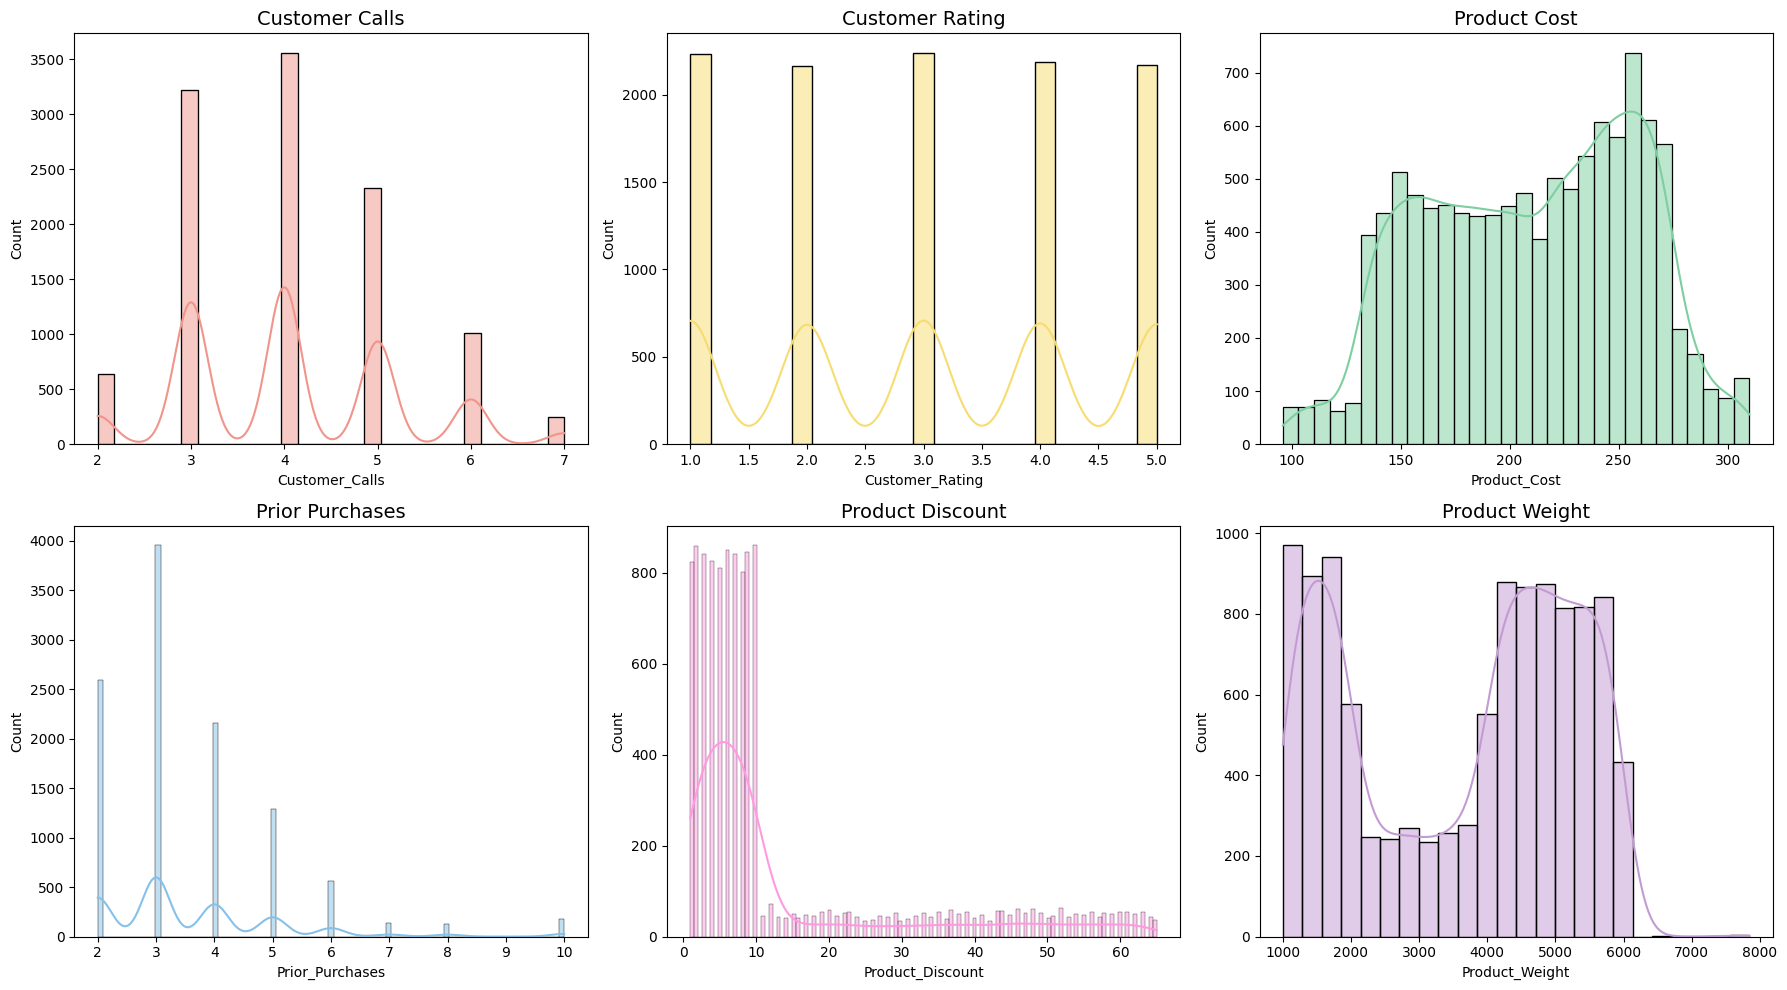

In [24]:
# creating histogram to show the data distribution through visualization
colors = ['#F1948A', '#F7DC6F', '#7DCEA0', '#85C1E9', '#FF9AE2', '#C39BD3']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(df.describe().columns):
    sns.histplot(data=df[col], kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(col.replace('_', ' ').title(), fontsize=14)

plt.tight_layout()
plt.show()

In [25]:
# perform the statistical test to check the normality of the numerical columns using D'Agostino and Pearson's test (normaltest)
# and checking the skewness value of the numerical columns using .skew() method
from scipy.stats import normaltest

for column in df.describe().columns:
    stat, pvalue = normaltest(df[column])
    skew = df[column].skew()
    
    if pvalue > 0.05:
        print(f'{column.replace("_", " ").title()} \nData appears normally distributed (p-value = {pvalue:.5f}).')
        if skew > 0.5:
            print(f'Skewness: {skew:.5f} (right-skewed).\n')
        elif skew < -0.5:
            print(f'Skewness: {skew:.5f} (left-skewed).\n')
        else:
            print(f'Skewness: {skew:.5f} (approximately symmetrical).\n')
    else:
        print(f'{column.replace("_", " ").title()} \nData does not appear normally distributed (p-value = {pvalue:.5f}).')
        if skew > 0.5:
            print(f'Skewness: {skew:.5f} (right-skewed).\n')
        elif skew < -0.5:
            print(f'Skewness: {skew:.5f} (left-skewed).\n')
        else:
            print(f'Skewness: {skew:.5f} (approximately symmetrical).\n')

Customer Calls 
Data does not appear normally distributed (p-value = 0.00000).
Skewness: 0.39193 (approximately symmetrical).

Customer Rating 
Data does not appear normally distributed (p-value = 0.00000).
Skewness: 0.00436 (approximately symmetrical).

Product Cost 
Data does not appear normally distributed (p-value = 0.00000).
Skewness: -0.15712 (approximately symmetrical).

Prior Purchases 
Data does not appear normally distributed (p-value = 0.00000).
Skewness: 1.68190 (right-skewed).

Product Discount 
Data does not appear normally distributed (p-value = 0.00000).
Skewness: 1.79893 (right-skewed).

Product Weight 
Data does not appear normally distributed (p-value = 0.00000).
Skewness: -0.24975 (approximately symmetrical).



**Summary**

- Both the visualization and statistical tests confirm that none of the columns follow a normal distribution, as evidenced by none of the columns having a typical bell-shaped curve and all columns having a low p-value.

- `Prior_Purchases` and `Product_Discount` display right-skewed distributions, indicating the mean is greater than the median.

- `Customer_Calls`, `Customer_Rating`, `Product_Cost`, and `Product_Weight` exhibit approximately symmetrical distributions because the skewness value falls between -0.5 and 0,5. Based on [<font color='#B85048'><u>this article</u></font>](https://www.geeksforgeeks.org/skewness-measures-and-interpretation/#:~:text=II.%20Magnitude%20of,strong%20right%20skewness.), if the skewness value is close to 0 (between -0.5 and 0.5), the distribution is approximately symmetric.

### **Identifying Outliers**

In the process of data analysis, it's essential to identify and address potential anomalies within the dataset. These anomalies, often referred to as outliers, are data points that deviate significantly from the expected pattern or the typical range of values.  Understanding and addressing them helps us gain a more accurate and representative picture of the data we're analyzing.

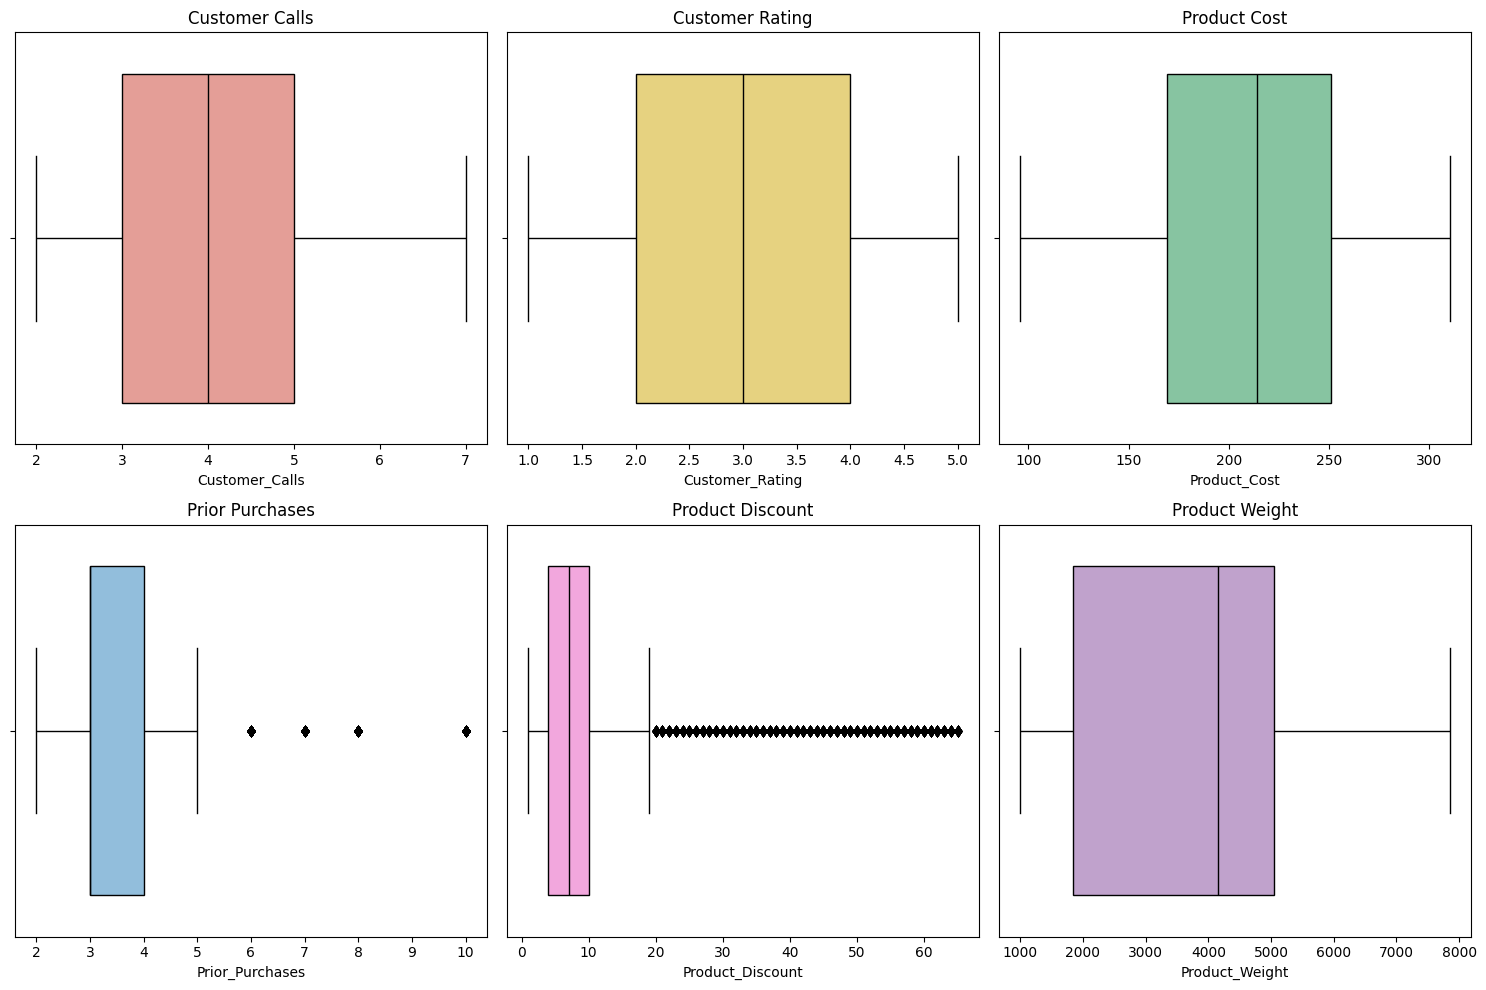

In [26]:
# creating a boxplot to show the outliers through visualization
colors = ['#F1948A', '#F7DC6F', '#7DCEA0', '#85C1E9', '#FF9AE2', '#C39BD3']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df.describe().columns):
    sns.boxplot(data=df[col], color=colors[i], ax=axes[i], orient='h', linecolor='black',
                flierprops=dict(marker='d', markersize=6, markeredgecolor='None', markerfacecolor='black'))
    axes[i].set_title(col.replace('_', ' ').title(), fontsize=12)

plt.tight_layout()
plt.show()

In [27]:
# define a function to calculate the outliers and their percentage for each numerical column in the dataset
def outlier_stats(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    count_outliers = len(outliers)
    percentage_outliers = (count_outliers / len(column)) * 100
    return count_outliers, percentage_outliers

for col in df.describe().columns:
    count_outliers, pct_outliers = outlier_stats(df[col])
    print(f'{col.replace("_", " ").title()}: {count_outliers} outliers ({pct_outliers:.2f}%)')

Customer Calls: 0 outliers (0.00%)
Customer Rating: 0 outliers (0.00%)
Product Cost: 0 outliers (0.00%)
Prior Purchases: 1003 outliers (9.12%)
Product Discount: 2209 outliers (20.08%)
Product Weight: 0 outliers (0.00%)


The analysis identified potential outliers in two variables: `Prior_Purchases` **(value: 1003, representing 9.12%)** and `Product_Discount` **(value: 2209, representing 20.08%)**. Given these significant deviations, a closer look at these outliers is a must.

### **Handling Outliers**

 Outliers are data points that deviate substantially from the typical range of values and we have identified outliers in `Prior_Purchases` and `Product_Discount`.  Since these data points fall far outside the norm, it's crucial to determine the best course of action. This might involve investigating them further, we need to figure out if they're real or errors, and how to account for them

In [28]:
# define function to do outlier analysis which shows the number and percentage of the outliers, 
# the difference in statistical description with and without outliers, and the suggestion of handling outliers
def outlier_analysis(column, threshold=5):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    num_outliers = len(outliers)
    perc_outliers = num_outliers / len(column) * 100
    
    stats_with_outliers = column.describe()
    stats_without_outliers = column[~((column < lower_bound) | (column > upper_bound))].describe()
    
    print(f'Column                  : {column.name.replace("_", " ")}')
    print(f'Number of Outliers      : {num_outliers}')
    print(f'Percentage of Outliers  : {perc_outliers:.2f}%')
    
    stats_df = pd.DataFrame({
        'With Outliers': stats_with_outliers,
        'Without Outliers': stats_without_outliers
    })
    
    display(stats_df)
    
    if perc_outliers > threshold:
        print(f'Percentage of outliers is above the threshold of {threshold}%. Consider keeping them for further analysis.')
    else:
        print(f'Percentage of outliers is below the threshold of {threshold}%. Consider removing them if necessary.')

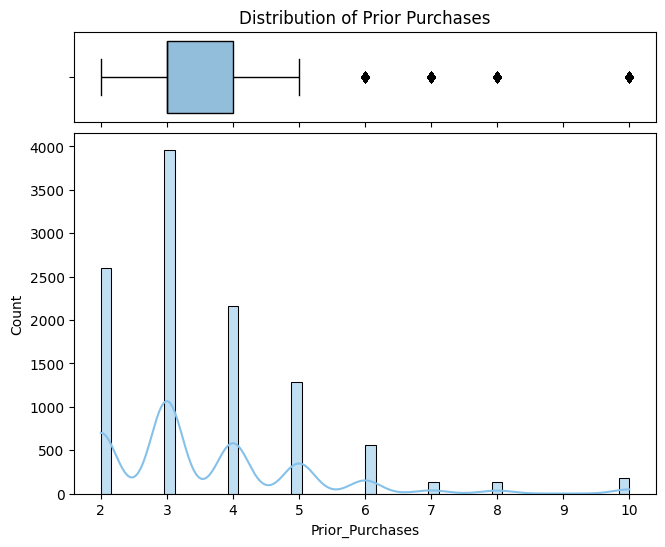

Column                  : Prior Purchases
Number of Outliers      : 1003
Percentage of Outliers  : 9.12%


,With Outliers,Without Outliers
count,10999.000000,9996.000000
mean,3.567597,3.213085
std,1.522860,0.972258
min,2.000000,2.000000
25%,3.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,10.000000,5.000000


Percentage of outliers is above the threshold of 5%. Consider keeping them for further analysis.


In [29]:
# creating a boxplot and histogram for 'Prior_Purchases' column to show the outliers and the data distribution through visualization
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(7.5, 6), gridspec_kw={'height_ratios': [0.20, 0.80],'hspace':0.05})
ax_box.set_title('Distribution of Prior Purchases')

sns.boxplot(x=df['Prior_Purchases'], ax=ax_box, color='#85C1E9', linecolor='black',
                flierprops=dict(marker='d', markersize=6, markeredgecolor='None', markerfacecolor='black'))
ax_box.set(xlabel='')
sns.histplot(data=df['Prior_Purchases'], ax=ax_hist, kde=True, bins=50, color='#85C1E9')

plt.show()

outlier_analysis(df['Prior_Purchases'])


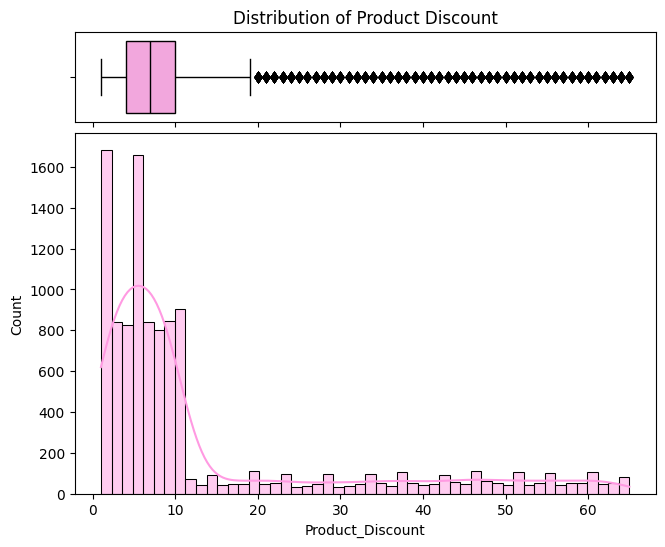

Column                  : Product Discount
Number of Outliers      : 2209
Percentage of Outliers  : 20.08%


,With Outliers,Without Outliers
count,10999.000000,8790.000000
mean,13.373216,5.975085
std,16.205527,3.523850
min,1.000000,1.000000
25%,4.000000,3.000000
50%,7.000000,6.000000
75%,10.000000,8.000000
max,65.000000,19.000000


Percentage of outliers is above the threshold of 5%. Consider keeping them for further analysis.


In [30]:
# creating a boxplot and histogram for 'Product_Discount' column to show the outliers and the data distribution through visualization
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(7.5, 6), gridspec_kw={'height_ratios': [0.20, 0.80],'hspace':0.05})
ax_box.set_title('Distribution of Product Discount')

sns.boxplot(x=df['Product_Discount'], ax=ax_box, color='#FF9AE2', linecolor='black',
                flierprops=dict(marker='d', markersize=6, markeredgecolor='None', markerfacecolor='black'))
ax_box.set(xlabel='')
sns.histplot(data=df['Product_Discount'], ax=ax_hist, kde=True, bins=50, color='#FF9AE2')

plt.show()

outlier_analysis(df['Product_Discount'])

**Summary**
- It starts by setting a **threshold of 5%** for identifying outliers. This means any data point that falls outside the normal range by more than 5% would be considered an outlier.
- After applying this threshold, we found that the percentage of outliers in both the `Product_Discount` and `Prior_Purchases` columns is **above 5%**. Since there were so many outliers, simply removing them based on the initial threshold would have meant discarding a significant portion of the data.
- Therefore, we decided to keep all the outliers for further investigation. This allows us to explore these unusual cases and understand why they exist, potentially revealing valuable insights.

- **Outlier Identification**: The analysis process identified a significant number of outliers in both the `Product_Discount` **(20.08%)** and `Prior_Purchases` **(9.12%)** columns.

- **Outlier Retention**:  After careful consideration, we opted to retain the outliers for further analysis. This decision was based on the potential value these outliers hold in understanding:

    + **Customer Purchasing Behavior**: Data in the `Prior_Purchases` column offers valuable insights into customer buying habits. Retaining outliers allows for a more comprehensive understanding of potential high-value customers or those exhibiting unique buying patterns.
    + **Discounting Strategy**: The `Product_Discount` column provides insights into the company's discounting strategy. Retaining outliers enables a deeper investigation of potentially large or strategic discounts offered to specific customers.

### **Data Segmentation**

To better understand the numerical data, we will use a method called data segmentation. This means dividing continuous numerical columns into different categories. By doing this, we can look at the data in groups, which helps us see the relationships and patterns more clearly.

In [31]:
df.head()

,Warehouse_Block,Shipment_Mode,Customer_Calls,Customer_Rating,Product_Cost,Prior_Purchases,Product_Importance,Gender,Product_Discount,Product_Weight,Delivery_Status
0,D,Flight,4,2,177,3,Low,Female,44,1233,Not On Time
1,E,Flight,4,5,216,2,Low,Male,59,3088,Not On Time
2,A,Flight,2,2,183,4,Low,Male,48,3374,Not On Time
3,B,Flight,3,3,176,4,Medium,Male,10,1177,Not On Time
4,C,Flight,2,2,184,3,Medium,Female,46,2484,Not On Time


In [32]:
# displaying the statistical description of a numeric column as a reference for data segmentation
df.describe()

,Customer_Calls,Customer_Rating,Product_Cost,Prior_Purchases,Product_Discount,Product_Weight
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


**Customer Care Calls Intensity Segmentation:**

In [33]:
# checking the unique value of the column to define the right segmentation
sorted(df['Customer_Calls'].unique())

[2, 3, 4, 5, 6, 7]

Based on the **unique value** of the column, we will divide it into **3 categories of intensity** such as below:
- **Few**       : Customer made few customer care calls (2-3 calls)
- **Moderate**  : Customer made moderate customer care calls (4-5 calls)
- **Frequent**  : Customer made frequent customer care calls (6-7 calls)

In [34]:
# create a new column called 'Calls_Intensity' as a data segmentation of the 'Customer_Calls' column 
# which will consist of 3 unique values/categories and place right after the 'Customer_Calls' column
df.insert(df.columns.get_loc('Customer_Calls') + 1, 
        'Calls_Intensity', ['Few' if (x <= 3) 
                                else 'Moderate' if (x > 3) & (x < 6) 
                                else 'Frequent' # (x > 5)
                                for x in df['Customer_Calls'].values
                        ])

In [35]:
sorted(df['Calls_Intensity'].unique())

['Few', 'Frequent', 'Moderate']

**Customer Rating Segmentation:**

In [36]:
# checking the unique value of the column to define the right segmentation
sorted(df['Customer_Rating'].unique())

[1, 2, 3, 4, 5]

Based on the **unique value** of the column, we will divide it into **2 categories of rating** such as below:
- **Low Rating - Dissatisfied**       : Customer gave a low rating indicating they are dissatisfied (rate 1-3)
- **High Rating - Satisfied**  : Customer gave a high rating indicating they are satisfied (rate 4-5)

In [37]:
# create a new column called 'Rating_Satisfaction' as a data segmentation of the 'Customer_Rating' column 
# which will consist of 2 unique values/categories and place right after the 'Customer_Rating' column
df.insert(df.columns.get_loc('Customer_Rating') + 1, 
        'Rating_Satisfaction', ['Low Rating - Dissatisfied' if (x <= 3)
                                else 'High Rating - Satisfied' # (x > 3)
                                for x in df['Customer_Rating'].values
                        ])

In [38]:
sorted(df['Rating_Satisfaction'].unique())

['High Rating - Satisfied', 'Low Rating - Dissatisfied']

**Product Cost Segmentation:**

In [39]:
# checking the statistical description of the column to define the right segmentation
df[['Product_Cost']].describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Cost,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0


Based on the **quartiles (25%, 50%, 75%) value** of the column, we will divide it into **3 categories of cost class** such as below:
- **Cheap**       : Product cost is relatively low (below $169 ➡️ below 25%)
- **Standard**  : Product cost is standard/normal ($169 - $251 ➡️ 25% - 75%)
- **Expensive**  : Product cost is relatively high (above $251 ➡️ above 75%)

In [40]:
# create a new column called 'Cost_Segment' as a data segmentation of the 'Product_Cost' column 
# which will consist of 3 unique values/categories and place right after the 'Product_Cost' column
df.insert(df.columns.get_loc('Product_Cost') + 1, 
        'Cost_Segment', ['Cheap' if (x < 169) # < 25% 
                                else 'Standard' if (x >= 169) & (x <= 251) # 25% - 75% 
                                else 'Expensive'  # (x > 251) => (> 75%)
                                for x in df['Product_Cost'].values
                        ])

In [41]:
sorted(df['Cost_Segment'].unique())

['Cheap', 'Expensive', 'Standard']

**Customer Prior Purchases Segmentation:**

In [42]:
# checking the unique value of the column to define the right segmentation
sorted(df['Prior_Purchases'].unique())

[2, 3, 4, 5, 6, 7, 8, 10]

Based on the **unique value** of the column, we will divide it into **3 categories of customer class** based on their prior purchases such as below:
- **New**       : Customer has made a few prior purchases (2-3 purchases)
- **Regular**  : Customer has made moderate prior purchases (4-6 purchases)
- **Loyal**  : Customer has made frequent prior purchases (7-10 purchases)

In [43]:
# create a new column called 'Customer_Segment' as a data segmentation of the 'Prior_Purchases' column 
# which will consist of 3 unique values/categories and place right after the 'Prior_Purchases' column
df.insert(df.columns.get_loc('Prior_Purchases') + 1, 
        'Customer_Segment', ['New' if (x <= 3) 
                                else 'Regular' if (x > 3) & (x <= 6)
                                else 'Loyal' # (x > 6)
                                for x in df['Prior_Purchases'].values
                        ])

In [44]:
sorted(df['Customer_Segment'].unique())

['Loyal', 'New', 'Regular']

**Product Discount Segmentation:**

In [45]:
# checking the statistical description of the column to define the right segmentation
df[['Product_Discount']].describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Discount,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0


Min and Max = 1 % and 65 % 
<br>
65 / 5 = 13, which means there are 12 discount intervals for each class
<br>
<br>
Based on the **min and max value** of the column, we will divide it into **5 categories of discount range class** (12 intervals for each class) such as below:
- **1-13 %**   : Discount offered falls in the range 1-13%
- **14-26 %**  : Discount offered falls in the range 14-26%
- **27-39 %**  : Discount offered falls in the range 27-39%
- **40-52 %**  : Discount offered falls in the range 40-52%
- **53-65 %**  : Discount offered falls in the range 53-65%

In [46]:
# create a new column called 'Discount_Segment' as a data segmentation of the 'Product_Discount' column 
# which will consist of 5 unique values/categories and place right after the 'Product_Discount' column
df.insert(df.columns.get_loc('Product_Discount') + 1, 
        'Discount_Segment', ['1-13(%)' if (x<=13) 
                                else '14-26(%)' if (x<=26) 
                                else '27-39(%)' if (x<=39) 
                                else '40-52(%)' if (x<=52) 
                                else '53-65(%)'
                                for x in df['Product_Discount'].values])

In [47]:
sorted(df['Discount_Segment'].unique())

['1-13(%)', '14-26(%)', '27-39(%)', '40-52(%)', '53-65(%)']

**Product Weight Segmentation:**

In [48]:
# checking the statistical description of the column to define the right segmentation
df[['Product_Weight']].describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Weight,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0


Based on the **quartiles (25%, 50%, 75%) value** of the column, we will divide it into **3 categories of weight class** such as below:
- **Light** : Product weight is relatively light (below 1839.5 grams ➡️ below 25%)
- **Medium**  : Product weight is medium (1839.5 grams - 5050 grams ➡️ 25% - 75%)
- **Heavy**  : Product weight is relatively heavy (above 5050 grams ➡️ above 75%)

In [49]:
# create a new column called 'Weight_Segment' as a data segmentation of the 'Product_Weight' column 
# which will consist of 3 unique values/categories and place right after the 'Product_Weight' column
df.insert(df.columns.get_loc('Product_Weight') + 1, 
        'Weight_Segment', ['Light' if (x < 1839.5) # < 25% 
                                else 'Medium' if (x >= 1839.5) & (x <= 5050) # 25% - 75%
                                else 'Heavy' # (x > 5050) => (> 75%)
                                for x in df['Product_Weight'].values
                        ])

In [50]:
sorted(df['Weight_Segment'].unique())

['Heavy', 'Light', 'Medium']

### **Saving the Cleaned Dataset**

After completing all data cleaning steps, the final stage involves saving the cleaned dataset file for further analysis. Before proceeding with the saving process, it is important to review the data set by checking the top and bottom entries to ensure completeness. Additionally, a thorough check for potential missing values ​​and duplicate entries is also a must to do. After ensuring that all aspects are in good condition, the cleaned dataset is then saved as a new file, ready to be used for the data analysis process.

In [51]:
# displaying the top and bottom data of the dataset
display(df.head(),
        df.tail())

,Warehouse_Block,Shipment_Mode,Customer_Calls,Calls_Intensity,Customer_Rating,Rating_Satisfaction,Product_Cost,Cost_Segment,Prior_Purchases,Customer_Segment,Product_Importance,Gender,Product_Discount,Discount_Segment,Product_Weight,Weight_Segment,Delivery_Status
0,D,Flight,4,Moderate,2,Low Rating - Dissatisfied,177,Standard,3,New,Low,Female,44,40-52(%),1233,Light,Not On Time
1,E,Flight,4,Moderate,5,High Rating - Satisfied,216,Standard,2,New,Low,Male,59,53-65(%),3088,Medium,Not On Time
2,A,Flight,2,Few,2,Low Rating - Dissatisfied,183,Standard,4,Regular,Low,Male,48,40-52(%),3374,Medium,Not On Time
3,B,Flight,3,Few,3,Low Rating - Dissatisfied,176,Standard,4,Regular,Medium,Male,10,1-13(%),1177,Light,Not On Time
4,C,Flight,2,Few,2,Low Rating - Dissatisfied,184,Standard,3,New,Medium,Female,46,40-52(%),2484,Medium,Not On Time


,Warehouse_Block,Shipment_Mode,Customer_Calls,Calls_Intensity,Customer_Rating,Rating_Satisfaction,Product_Cost,Cost_Segment,Prior_Purchases,Customer_Segment,Product_Importance,Gender,Product_Discount,Discount_Segment,Product_Weight,Weight_Segment,Delivery_Status
10994,A,Ship,4,Moderate,1,Low Rating - Dissatisfied,252,Expensive,5,Regular,Medium,Female,1,1-13(%),1538,Light,Not On Time
10995,B,Ship,4,Moderate,1,Low Rating - Dissatisfied,232,Standard,5,Regular,Medium,Female,6,1-13(%),1247,Light,On Time
10996,C,Ship,5,Moderate,4,High Rating - Satisfied,242,Standard,5,Regular,Low,Female,4,1-13(%),1155,Light,On Time
10997,E,Ship,5,Moderate,2,Low Rating - Dissatisfied,223,Standard,6,Regular,Medium,Male,2,1-13(%),1210,Light,On Time
10998,D,Ship,2,Few,5,High Rating - Satisfied,155,Cheap,5,Regular,Low,Female,6,1-13(%),1639,Light,On Time


In [52]:
# checking the missing value for each column in the dataset
df.isna().sum()

Warehouse_Block        0
Shipment_Mode          0
Customer_Calls         0
Calls_Intensity        0
Customer_Rating        0
Rating_Satisfaction    0
Product_Cost           0
Cost_Segment           0
Prior_Purchases        0
Customer_Segment       0
Product_Importance     0
Gender                 0
Product_Discount       0
Discount_Segment       0
Product_Weight         0
Weight_Segment         0
Delivery_Status        0
dtype: int64

In [53]:
# checking the duplicate data for each column in the dataset
df.duplicated().sum()

0

After thoroughly reviewing and double-checking the cleaned dataset, everything appears to be in good condition. Therefore, we can now save the cleaned dataset as a new .csv file for further data analysis.

In [54]:
# saving the cleaned dataset as a new .csv file
df.to_csv('Online Retail Shipping Cleaned Dataset.csv')

****
# **Data Analysis**
****
Having thoroughly cleaned and prepared the dataset, we are now ready to embark on the data analysis phase. This step is crucial in gaining actionable insights to address our business problems. Our primary focus will be to understand the key factors contributing to shipping delays and determine how we can optimize the shipping process to reduce these delays.

We will begin by examining the correlations between all numerical columns to identify any significant relationships. Next, we will analyze the delivery status in relation to three main factors:

1. **Shipping Factors:** This includes analyzing the impact of warehouse blocks and shipment modes on delivery times.
2. **Product Factors:** We will investigate how product importance, cost, discount, and weight affect delivery efficiency.
3. **Customer Factors:** Lastly, we will look into customer care calls intensity, customer ratings, prior purchases, and gender to see how these customer-related factors influence shipping delays.

After analyzing these three main factors, we will delve deeper by examining the correlation between delivery status and other numerical columns to strengthen the insights obtained. Additionally, we will perform other relevant analyses to further validate and enhance our understanding of the factors influencing shipping delays.

Through this detailed analysis, we aim to uncover the underlying reasons for delivery delays and identify opportunities for improving the overall efficiency and reliability of the delivery system.

To demonstrate the correlation between delivery status and other features, it is necessary to convert categorical data into numerical format. Therefore, we will create new columns to transform `Product_Importance` into numerical ordinal data and `Delivery_Status` back to binary values (1 and 0).

**`Product_Importance_Num` Column:**
- **1** = Low
- **2** = Medium
- **3** = High

In [55]:
# create a new column called 'Product_Importance_Num' as a numerical ordinal data of the 'Product_Importance' column 
# which will consist of numbers 1, 2, and 3 indicating 3 categories of product importance level 
# and place right after the 'Product_Importance' column
df.insert(df.columns.get_loc('Product_Importance') + 1, 
        'Product_Importance_Num', [1 if x == 'Low' 
                                    else 2 if x == 'Medium' 
                                    else 3 
                                    for x in df['Product_Importance'].values
                                ])

**`Delivery_Status_IsNotOnTime` Column:**
- **1** = Not On Time
- **0** = On Time

In [56]:
# create a new column called 'Delivery_Status_IsNotOnTime' as the numerical data (binary) of the 'Delivery_Status' column 
# which will consist of numbers 1 and 0 indicating 2 categories of delivery status 
# and place right after the 'Delivery_Status' column
df.insert(df.columns.get_loc('Delivery_Status') + 1, 
        'Delivery_Status_IsNotOnTime', [1 if x == 'Not On Time' 
                                    else 0 
                                    for x in df['Delivery_Status'].values
                                ])

In [57]:
display(
    df.head(),
    df.tail()
)

,Warehouse_Block,Shipment_Mode,Customer_Calls,Calls_Intensity,Customer_Rating,Rating_Satisfaction,Product_Cost,Cost_Segment,Prior_Purchases,Customer_Segment,Product_Importance,Product_Importance_Num,Gender,Product_Discount,Discount_Segment,Product_Weight,Weight_Segment,Delivery_Status,Delivery_Status_IsNotOnTime
0,D,Flight,4,Moderate,2,Low Rating - Dissatisfied,177,Standard,3,New,Low,1,Female,44,40-52(%),1233,Light,Not On Time,1
1,E,Flight,4,Moderate,5,High Rating - Satisfied,216,Standard,2,New,Low,1,Male,59,53-65(%),3088,Medium,Not On Time,1
2,A,Flight,2,Few,2,Low Rating - Dissatisfied,183,Standard,4,Regular,Low,1,Male,48,40-52(%),3374,Medium,Not On Time,1
3,B,Flight,3,Few,3,Low Rating - Dissatisfied,176,Standard,4,Regular,Medium,2,Male,10,1-13(%),1177,Light,Not On Time,1
4,C,Flight,2,Few,2,Low Rating - Dissatisfied,184,Standard,3,New,Medium,2,Female,46,40-52(%),2484,Medium,Not On Time,1


,Warehouse_Block,Shipment_Mode,Customer_Calls,Calls_Intensity,Customer_Rating,Rating_Satisfaction,Product_Cost,Cost_Segment,Prior_Purchases,Customer_Segment,Product_Importance,Product_Importance_Num,Gender,Product_Discount,Discount_Segment,Product_Weight,Weight_Segment,Delivery_Status,Delivery_Status_IsNotOnTime
10994,A,Ship,4,Moderate,1,Low Rating - Dissatisfied,252,Expensive,5,Regular,Medium,2,Female,1,1-13(%),1538,Light,Not On Time,1
10995,B,Ship,4,Moderate,1,Low Rating - Dissatisfied,232,Standard,5,Regular,Medium,2,Female,6,1-13(%),1247,Light,On Time,0
10996,C,Ship,5,Moderate,4,High Rating - Satisfied,242,Standard,5,Regular,Low,1,Female,4,1-13(%),1155,Light,On Time,0
10997,E,Ship,5,Moderate,2,Low Rating - Dissatisfied,223,Standard,6,Regular,Medium,2,Male,2,1-13(%),1210,Light,On Time,0
10998,D,Ship,2,Few,5,High Rating - Satisfied,155,Cheap,5,Regular,Low,1,Female,6,1-13(%),1639,Light,On Time,0


### **Correlation Heatmap between all Numerical Columns**

Next up, we will create a correlation heatmap to visualize how numerical columns relate to each other. This heatmap gives a quick snapshot of any potential connections between our data points, helping us pinpoint important correlations at a glance for further analysis.

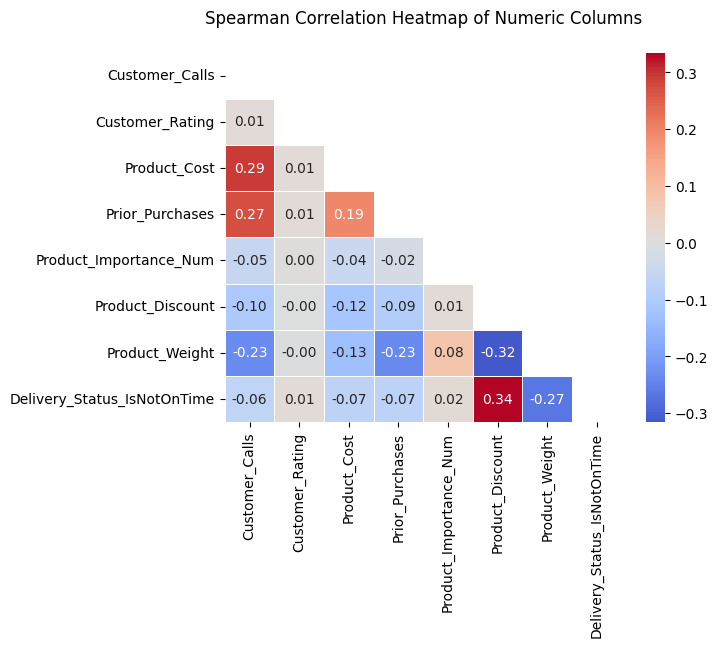

In [58]:
# creating a heatmap to show the correlation between all numerical columns
# using the Spearman method to calculate the correlation since all numerical columns are not normally distributed
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_spearman = numeric_df.corr(method='spearman')

mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

sns.heatmap(corr_spearman, cmap='coolwarm', annot=True, fmt=".2f", center=0, linewidths=0.5, mask=mask)
plt.title('Spearman Correlation Heatmap of Numeric Columns\n')
plt.show()

**INSIGHT 1**
****
Based on the Spearman correlation heatmap:

1. **Product Discount and Delivery Status**: There is a **moderate positive correlation (0.34)** between `Product_Discount` and `Delivery_Status_IsNotOnTime`. This indicates that **higher discounts** are somewhat associated with **deliveries not being on time (delayed)**.

2. **Product Weight and Delivery Status**: There is a **moderate negative correlation (-0.27)** between `Product_Weight` and `Delivery_Status_IsNotOnTime`. This suggests that **heavier products** are more likely to be **delivered on time**.

3. **Product Discount and Product Weight**: There is a **moderate negative correlation (-0.32)** between `Product_Discount` and `Product_Weight`, indicating that **higher discounts** tend to be **offered on lighter products**.

4. **Customer Calls and Product Cost**: There is a **positive correlation (0.29)** between `Customer_Calls` and `Product_Cost`, suggesting that **more customer care calls** are associated with **higher-cost** products.

5. **Customer Calls and Prior Purchases**: There is a **positive correlation (0.27)** between `Customer_Calls` and `Prior_Purchases`, indicating that **more often customer care calls** are associated with customers who make **more prior purchases**.

6. **Product Cost and Prior Purchases**: There is a **positive correlation (0.19)** between `Product_Cost` and `Prior_Purchases`, suggesting that products with **higher costs** are **often purchased more frequently**.

7. **Prior Purchases and Product Weight**: There is a **negative correlation (-0.23)** between `Prior_Purchases` and `Product_Weight`, indicating that **more frequent purchases** are associated with **lighter products**.

8. **Customer Calls and Product Weight**: There is a **negative correlation (-0.23)** between `Customer_Calls` and `Product_Weight`, suggesting that **more often customer care calls** are associated with **lighter products**.

9. **Product Cost and Product Weight**: There is a **negative correlation (-0.13)** between `Product_Cost` and `Product_Weight`, indicating that products with **higher costs** are associated with **lighter products**.

10. **Other Factors**: Other correlations are relatively low, suggesting weaker relationships between the variables.

<br>**CORE INSIGHTS**
****
- **Discounts and Product Weight**: **Discounts and product weight** are the **most crucial factors affecting delivery times**. **Higher discounts** often lead to **delays**, while **heavier products** tend to arrive **on time**.

- **Product Cost and Customer Care Calls**: **Expensive products** often lead to **more calls** to customer service. Also, people who **purchased more frequently** tend to **call for help more often**.

- **Product Weight and Customer Behavior**: **Lighter products** usually come with **bigger discounts**, attract **more customer service calls**, are **purchased more frequently**, and tend to have **higher costs**.

### **Categorical Columns Exploration**

In this stage, we will take a closer look at our categorical columns. We will be examining the non-numeric aspects of our dataset to reveal key insights and trends.

In [59]:
# displaying the statistical description of the categorical columns
stats_list = []

for col in df.select_dtypes(include='object').columns:
    stats = df[col].describe(include='object')
    unique_values = sorted(df[col].unique())
    stats_list.append([stats['count'], stats['unique'], stats['top'], stats['freq'], unique_values])

combined_df = pd.DataFrame(stats_list, columns=['Count', 'Unique', 'Top', 'Freq', 'Unique Values'], index=df.select_dtypes(include='object').columns)
combined_df

,Count,Unique,Top,Freq,Unique Values
Warehouse_Block,10999,5,E,3666,"[A, B, C, D, E]"
Shipment_Mode,10999,3,Ship,7462,"[Flight, Road, Ship]"
Calls_Intensity,10999,3,Moderate,5885,"[Few, Frequent, Moderate]"
Rating_Satisfaction,10999,2,Low Rating - Dissatisfied,6639,"[High Rating - Satisfied, Low Rating - Dissati..."
Cost_Segment,10999,3,Standard,5620,"[Cheap, Expensive, Standard]"
Customer_Segment,10999,3,New,6554,"[Loyal, New, Regular]"
Product_Importance,10999,3,Low,5297,"[High, Low, Medium]"
Gender,10999,2,Female,5545,"[Female, Male]"
Discount_Segment,10999,5,1-13(%),8514,"[1-13(%), 14-26(%), 27-39(%), 40-52(%), 53-65(%)]"
Weight_Segment,10999,3,Medium,5500,"[Heavy, Light, Medium]"


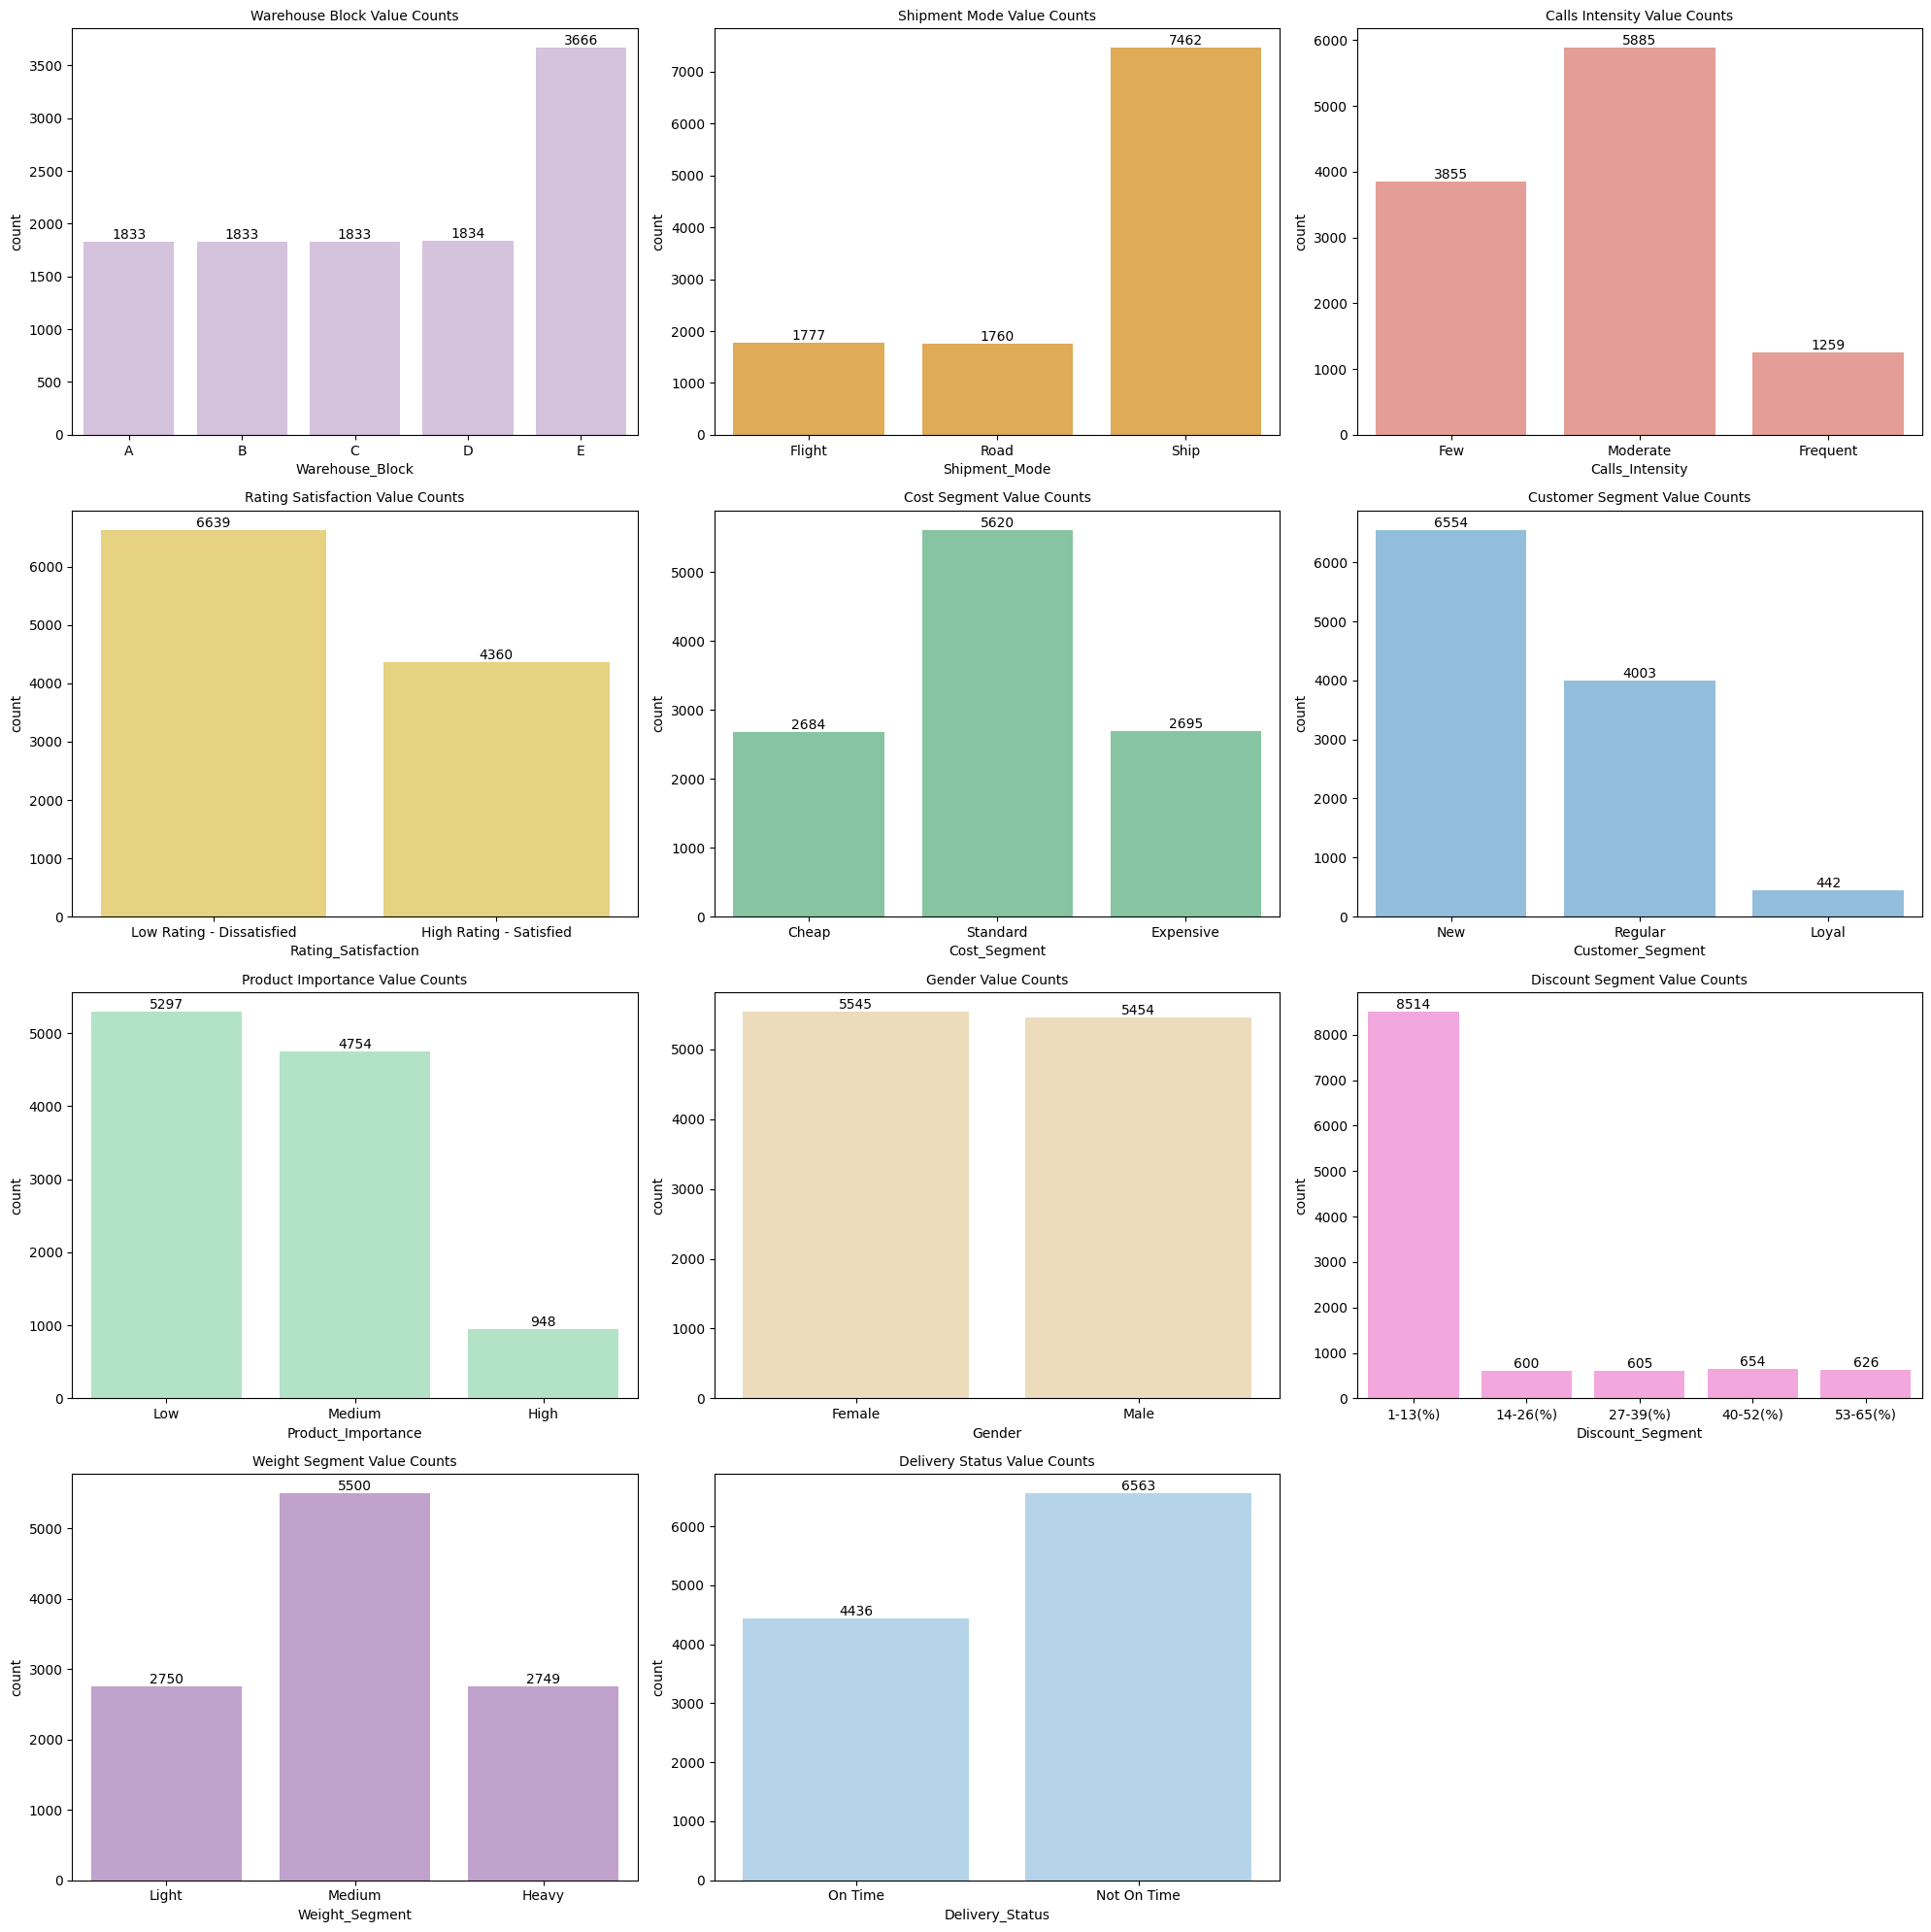

In [60]:
# creating a countplot for all categorical columns to gain any insight, pattern/trend
orders = {
    'Warehouse_Block': ['A', 'B', 'C', 'D', 'E'],
    'Shipment_Mode': ['Flight', 'Road', 'Ship'],
    'Calls_Intensity': ['Few', 'Moderate', 'Frequent'],
    'Rating_Satisfaction': ['Low Rating - Dissatisfied', 'High Rating - Satisfied'],
    'Cost_Segment': ['Cheap', 'Standard', 'Expensive'],
    'Customer_Segment': ['New', 'Regular', 'Loyal'],
    'Product_Importance': ['Low', 'Medium', 'High'],
    'Gender': ['Female', 'Male'],
    'Discount_Segment': ['1-13(%)', '14-26(%)', '27-39(%)', '40-52(%)', '53-65(%)'],
    'Weight_Segment': ['Light', 'Medium', 'Heavy'],
    'Delivery_Status': ['On Time', 'Not On Time']
}

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
cols = ['#D7BDE2', '#F5B041', '#F1948A', '#F7DC6F', '#7DCEA0', '#85C1E9', '#ABEBC6', '#F5DEB3', '#FF9AE2', '#C39BD3', '#AED6F1']

for i, (col, values) in enumerate(orders.items()):
    ax = axes.flatten()[i]
    sns.countplot(x=df[col], color=cols[i], ax=ax, order=values)
    ax.set_title(f'{col.replace("_", " ").title()} Value Counts', fontsize=10)
    ax.bar_label(ax.containers[0], label_type='edge')

plt.delaxes(axes.flatten()[-1])
plt.tight_layout()
plt.show()


**INSIGHT 2**
****
- Regarding **shipping factors**, most shipments originate from Warehouse **Block E** and are delivered via **Ship mode**, but a significant number of deliveries are marked as **"Not On Time"**.
- Regarding **product factors**, the most common products are **standard-priced**, **not very important**, offered **discounts between 1-13%**, and are **medium in weight**.
- Regarding **customer factors**, **new customers** who have made 2-3 purchases are the most common group, and they typically have **moderate interactions**, but are **not very satisfied**. Additionally, the majority of them are **female**.

### **Delivery Status Analysis**

In this stage, we investigate the performance of the delivery services by comparing three key factors: shipping, product, and customer details. We will explore how variations in these factors may impact delivery status. Additionally, we will examine the correlation between delivery-related columns and other numerical columns in the dataset. We aim to optimize the delivery processes by uncovering insights in these areas.

In [61]:
# calculate the count and percentage of each delivery status
counts = df['Delivery_Status'].value_counts()
percentages = df['Delivery_Status'].value_counts(normalize=True) * 100

delivery = pd.DataFrame({'Count': counts, 'Percentage': percentages})
delivery.reset_index()

,Delivery_Status,Count,Percentage
0,Not On Time,6563,59.669061
1,On Time,4436,40.330939


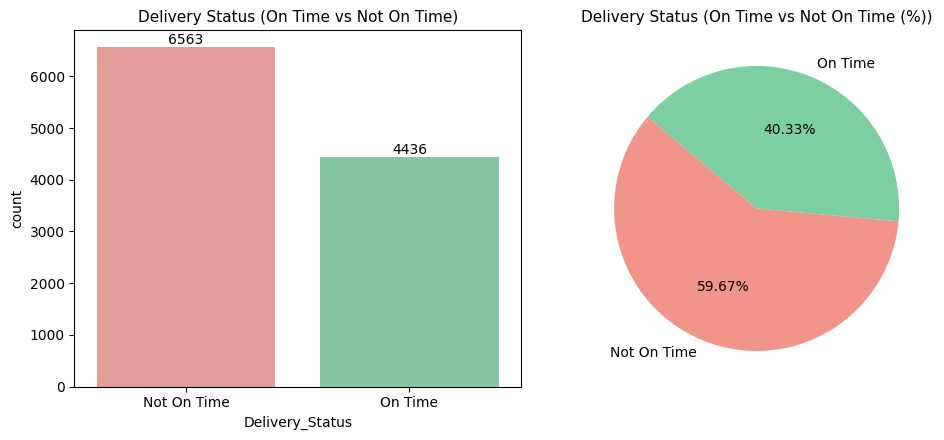

In [62]:
# create a subplot with two plots: a countplot and a pie chart showing delivery status information
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# plot countplot of delivery status
sns.countplot(data=df, x='Delivery_Status', palette=['#F1948A', '#7DCEA0'], ax=ax1, hue='Delivery_Status')
ax1.set_title('Delivery Status (On Time vs Not On Time)', fontsize=11)

containers = ax1.containers

for container in containers:
    ax1.bar_label(container)

# plot pie chart of delivery status proportions
pie_data = df['Delivery_Status'].value_counts()
labels = pie_data.index
sizes = pie_data.values

ax2.pie(sizes, labels=labels, colors=['#F1948A', '#7DCEA0'], autopct='%.2f%%', startangle=140)
ax2.set_title('Delivery Status (On Time vs Not On Time (%))', fontsize=11)

plt.tight_layout()
plt.show()

**INSIGHT 3**
****
- **Most Deliveries Are Late**: 59.67% of deliveries (6563) are not on time or delayed.
- **Fewer Deliveries Are On Time**: 40.33% of deliveries (4436) are on time.

##### **Delivery Status Comparison Based on Shipping Factors (Warehouse Block and Shipment Mode)**

This section compares delivery status based on warehouse block and shipment mode to understand their impact on delivery times.

In [63]:
# define function to calculate counts and percentages of delivery status grouped by a specified column
def calculate_counts_and_percentages(df, column):
    counts = df.groupby(column)['Delivery_Status'].value_counts()
    percentages = df.groupby(column)['Delivery_Status'].value_counts(normalize=True) * 100
    result_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    return result_df.reset_index()

In [64]:
# calculate counts and percentages of delivery status grouped by 'Warehouse_Block' and 'Shipment_Mode' by calling the defined function
warehouse = calculate_counts_and_percentages(df, 'Warehouse_Block')
shipment = calculate_counts_and_percentages(df, 'Shipment_Mode')

display(warehouse, shipment)

,Warehouse_Block,Delivery_Status,Count,Percentage
0,A,Not On Time,1075,58.647027
1,A,On Time,758,41.352973
2,B,Not On Time,1104,60.229133
3,B,On Time,729,39.770867
4,C,Not On Time,1094,59.683579
5,C,On Time,739,40.316421
6,D,Not On Time,1096,59.760087
7,D,On Time,738,40.239913
8,E,Not On Time,2194,59.847245
9,E,On Time,1472,40.152755


,Shipment_Mode,Delivery_Status,Count,Percentage
0,Flight,Not On Time,1069,60.157569
1,Flight,On Time,708,39.842431
2,Road,Not On Time,1035,58.806818
3,Road,On Time,725,41.193182
4,Ship,Not On Time,4459,59.756098
5,Ship,On Time,3003,40.243902


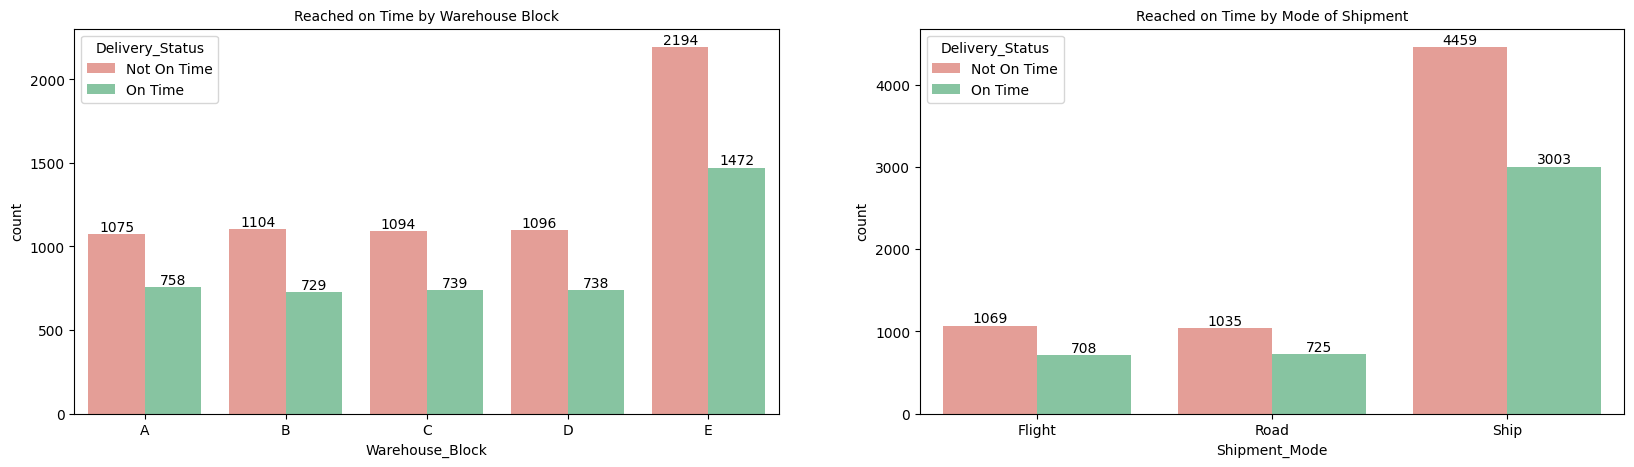

In [65]:
# create a subplot with two countplots showing delivery status by warehouse block and shipment mode
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

cols = ['#F1948A', '#7DCEA0']

sns.countplot(data=df, x='Warehouse_Block', hue ='Delivery_Status', palette=cols, ax=ax1, order=['A','B','C','D','E'])
sns.countplot(data=df, x='Shipment_Mode', hue ='Delivery_Status', palette=cols, ax=ax2, order=['Flight','Road','Ship'])

ax1.set_title('Reached on Time by Warehouse Block', fontsize=10)
ax2.set_title('Reached on Time by Mode of Shipment', fontsize=10)

for container in ax1.containers:
    ax1.bar_label(container, label_type='edge')

for container in ax2.containers:
    ax2.bar_label(container, label_type='edge')
    
plt.show()

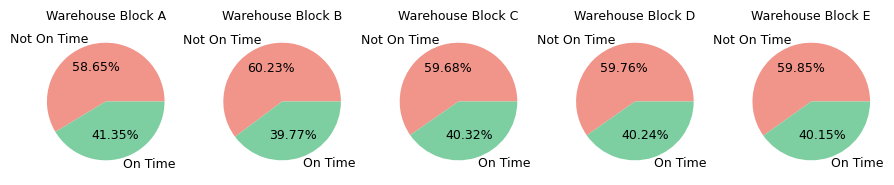

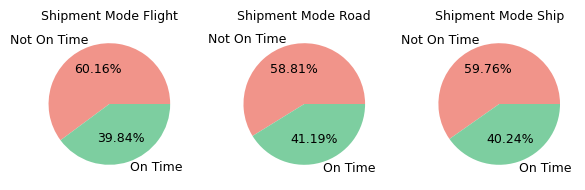

In [66]:
warehouse_blocks = sorted(df['Warehouse_Block'].unique())
shipment_modes = sorted(df['Shipment_Mode'].unique())

cols = ['#F1948A', '#7DCEA0']
plt.rcParams['font.size'] = 9

# Plot pie charts for delivery status by warehouse block
plt.figure(figsize=(11, 6))
for i, warehouse_block in enumerate(warehouse_blocks, 1):
    subset = df[df['Warehouse_Block'] == warehouse_block]
    counts = subset['Delivery_Status'].value_counts()
    plt.subplot(2, 5, i)
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', colors=cols)
    plt.title(f'Warehouse Block {warehouse_block}', fontsize=9)

# Plot pie charts for delivery status by shipment mode
plt.figure(figsize=(6, 3))
for i, shipment_mode in enumerate(shipment_modes, 1):
    subset = df[df['Shipment_Mode'] == shipment_mode]
    counts = subset['Delivery_Status'].value_counts()
    plt.subplot(1, 3, i)
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', colors=cols)
    plt.title(f'Shipment Mode {shipment_mode}', fontsize=9)

plt.tight_layout()
plt.show()


**INSIGHT 4**
****
- **Delivery Status Dominance**:
    + **Not On Time** deliveries dominate across all categories, comprising approximately 60% of the total deliveries, while On Time deliveries make up the remaining 40%.

- **Dominant Categories**:
    + **For Warehouse Blocks:** **Block E** has the highest number of deliveries, with 2194 not on time (59.85%) and 1472 on time (40.15%).
    + **For Shipment Modes:** **Ship mode** shows the highest number of deliveries, with 4459 not on time (59.76%) and 3003 on time (40.24%).

- **Highest Not On Time Rate (Lower Performance)**:
    + **For Warehouse Blocks:** **Block B** exhibits the highest not on time rate of 60.23%.
    + **For Shipment Modes:** **Flight mode** demonstrates the highest not on time rate of 60.16%.

- **Highest On Time Rate (Good Performance)**:
    + **For Warehouse Blocks:** **Block A** showcases the highest on time rate of 41.35%.
    + **For Shipment Modes:** **Road mode** displays the highest on time rate of 41.19%.

##### **Delivery Status Comparison Based on Product Factors (Product's: Importance Level, Cost, Discount Offered, Weight)**

This section compares delivery status based on four product factors: importance level, cost, discount offered, and weight. By examining these factors, we aim to understand their influence on delivery performance.

In [67]:
# calculate counts and percentages of delivery status grouped by
# product factors (importance, cost, discount, and weight) by calling the defined function
importance = calculate_counts_and_percentages(df, 'Product_Importance')
cost = calculate_counts_and_percentages(df, 'Cost_Segment')
discount = calculate_counts_and_percentages(df, 'Discount_Segment')
weight = calculate_counts_and_percentages(df, 'Weight_Segment')

display(importance, cost, discount, weight)

,Product_Importance,Delivery_Status,Count,Percentage
0,High,Not On Time,616,64.978903
1,High,On Time,332,35.021097
2,Low,Not On Time,3140,59.278837
3,Low,On Time,2157,40.721163
4,Medium,Not On Time,2807,59.045015
5,Medium,On Time,1947,40.954985


,Cost_Segment,Delivery_Status,Count,Percentage
0,Cheap,Not On Time,1730,64.456036
1,Cheap,On Time,954,35.543964
2,Expensive,Not On Time,1498,55.584416
3,Expensive,On Time,1197,44.415584
4,Standard,Not On Time,3335,59.341637
5,Standard,On Time,2285,40.658363


,Discount_Segment,Delivery_Status,Count,Percentage
0,1-13(%),On Time,4436,52.10242
1,1-13(%),Not On Time,4078,47.89758
2,14-26(%),Not On Time,600,100.00000
3,27-39(%),Not On Time,605,100.00000
4,40-52(%),Not On Time,654,100.00000
5,53-65(%),Not On Time,626,100.00000


,Weight_Segment,Delivery_Status,Count,Percentage
0,Heavy,On Time,1571,57.148054
1,Heavy,Not On Time,1178,42.851946
2,Light,Not On Time,1865,67.818182
3,Light,On Time,885,32.181818
4,Medium,Not On Time,3520,64.000000
5,Medium,On Time,1980,36.000000


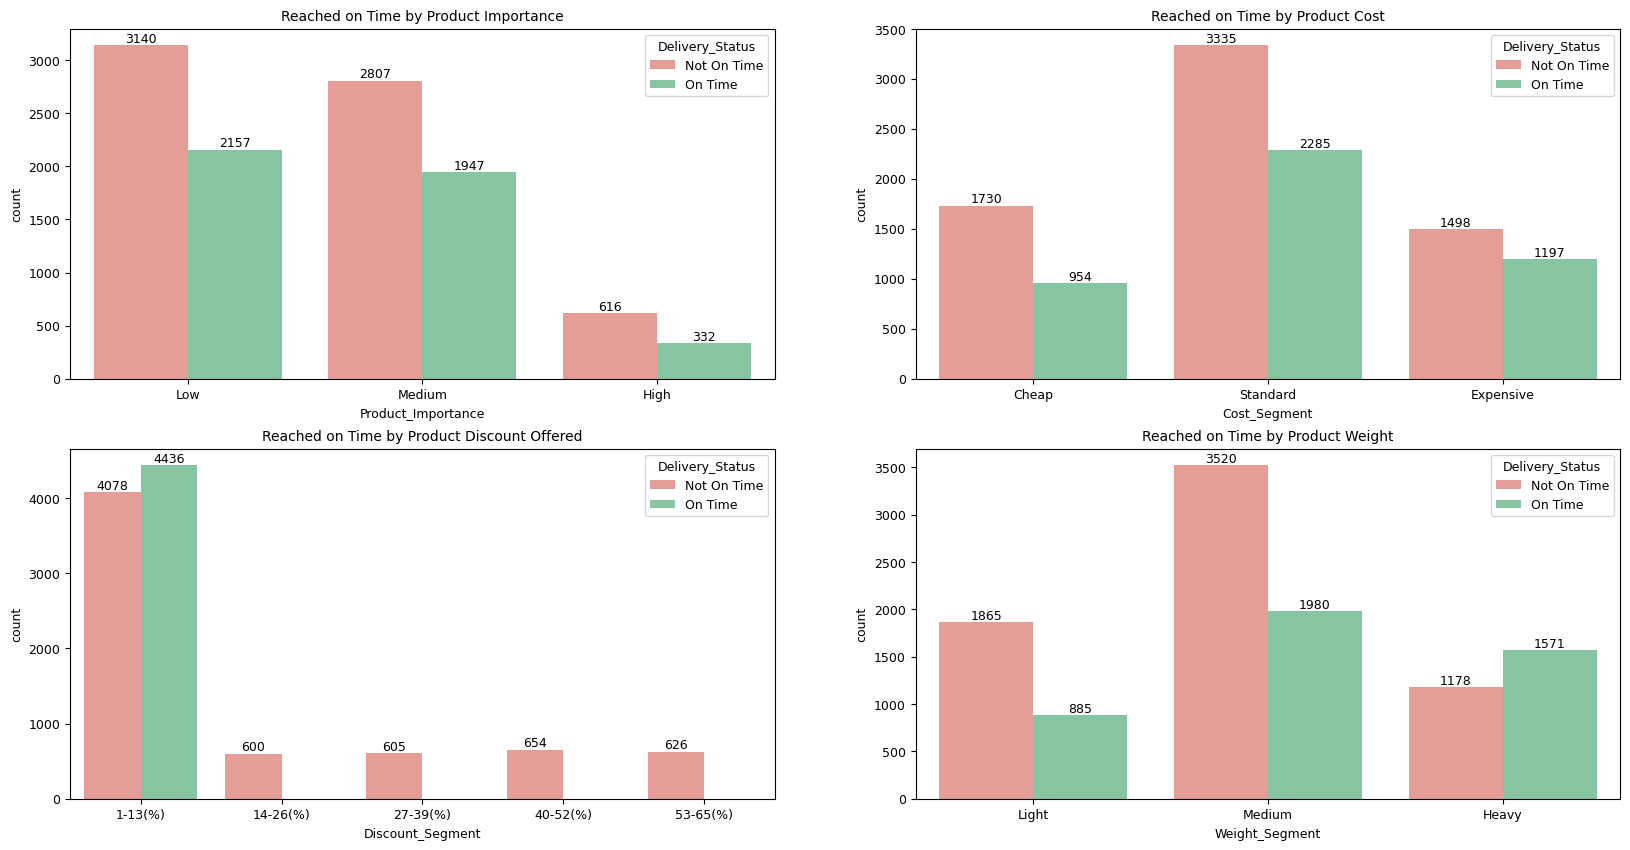

In [68]:
# create a subplot with four countplots showing delivery status by product factors (importance, cost, discount, and weight)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

cols = ['#F1948A', '#7DCEA0']

sns.countplot(data=df, x='Product_Importance', hue ='Delivery_Status', palette=cols, ax=ax1, order=['Low', 'Medium', 'High'])
sns.countplot(data=df, x='Cost_Segment', hue ='Delivery_Status', palette=cols, ax=ax2, order=['Cheap', 'Standard', 'Expensive'])
sns.countplot(data=df, x='Discount_Segment', hue ='Delivery_Status', palette=cols, ax=ax3, order=['1-13(%)', '14-26(%)', '27-39(%)', '40-52(%)', '53-65(%)'])
sns.countplot(data=df, x='Weight_Segment', hue ='Delivery_Status', palette=cols, ax=ax4, order=['Light', 'Medium', 'Heavy'])

ax1.set_title('Reached on Time by Product Importance', fontsize=10)
ax2.set_title('Reached on Time by Product Cost', fontsize=10)
ax3.set_title('Reached on Time by Product Discount Offered', fontsize=10)
ax4.set_title('Reached on Time by Product Weight', fontsize=10)

for container in ax1.containers:
    ax1.bar_label(container, label_type='edge')

for container in ax2.containers:
    ax2.bar_label(container, label_type='edge')

for container in ax3.containers:
    ax3.bar_label(container, label_type='edge')

for container in ax4.containers:
    ax4.bar_label(container, label_type='edge')

plt.show()

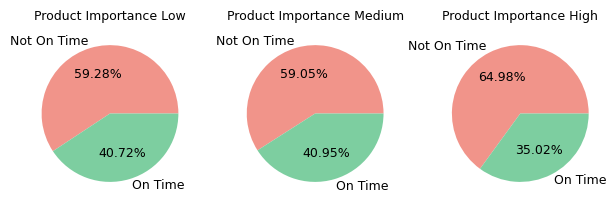

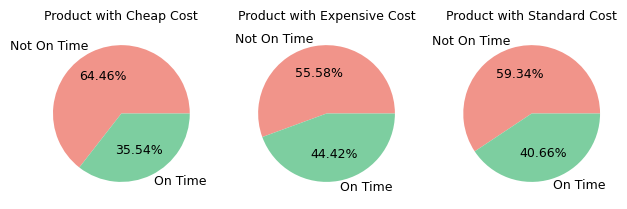

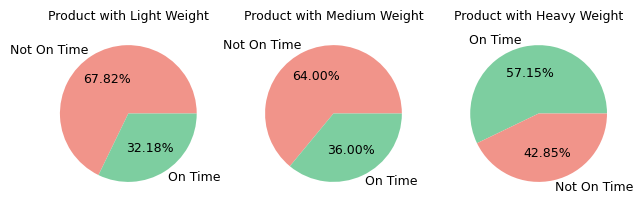

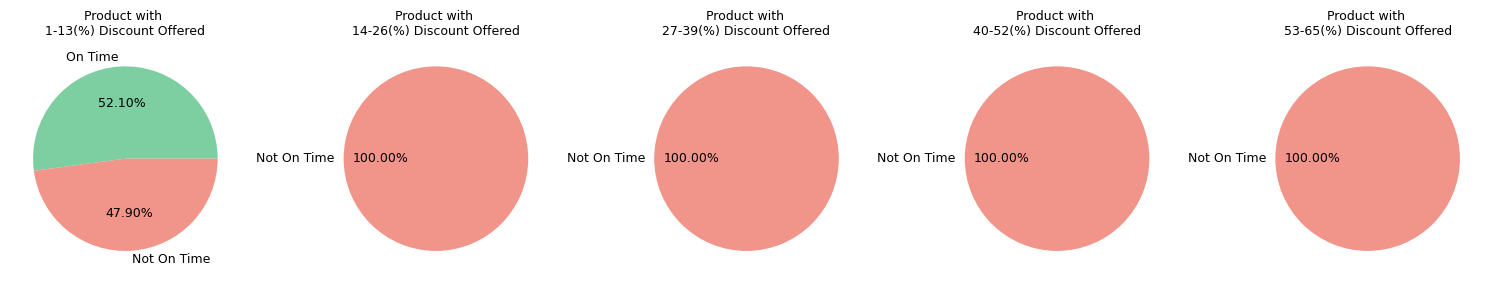

In [69]:
importance = df['Product_Importance'].unique()
cost = sorted(df['Cost_Segment'].unique())
discount = sorted(df['Discount_Segment'].unique())
weight = df['Weight_Segment'].unique()

colors_dict = {'Not On Time': '#F1948A', 'On Time': '#7DCEA0'}

plt.rcParams['font.size'] = 9

# Plot pie charts for delivery status by product importance
plt.figure(figsize=(7.5, 3))
for i, importance_value in enumerate(importance, 1):
    subset = df[df['Product_Importance'] == importance_value]
    counts = subset['Delivery_Status'].value_counts()
    plt.subplot(1, 3, i)
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', colors=[colors_dict[label] for label in counts.index])
    plt.title(f'Product Importance {importance_value}', fontsize=9)

# Plot pie charts for delivery status by product cost
plt.figure(figsize=(7.5, 3))
for i, cost_value in enumerate(cost, 1):
    subset = df[df['Cost_Segment'] == cost_value]
    counts = subset['Delivery_Status'].value_counts()
    plt.subplot(1, 3, i)
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', colors=[colors_dict[label] for label in counts.index])
    plt.title(f'Product with {cost_value} Cost', fontsize=9)

# Plot pie charts for delivery status by product weight
plt.figure(figsize=(7.5, 3))
for i, weight_value in enumerate(weight, 1):
    subset = df[df['Weight_Segment'] == weight_value]
    counts = subset['Delivery_Status'].value_counts()
    plt.subplot(1, 3, i)
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', colors=[colors_dict[label] for label in counts.index])
    plt.title(f'Product with {weight_value} Weight', fontsize=9)

# Plot pie charts for delivery status by product discount offered
plt.figure(figsize=(15, 6))
for i, discount_value in enumerate(discount, 1):
    subset = df[df['Discount_Segment'] == discount_value]
    counts = subset['Delivery_Status'].value_counts()
    plt.subplot(2, 5, i)
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', colors=[colors_dict[label] for label in counts.index])
    plt.title(f'Product with \n{discount_value} Discount Offered', fontsize=9)

plt.tight_layout()
plt.show()

**INSIGHT 5**
****
- **Delivery Status Dominance:**
  - **Not On Time deliveries still dominate** across all categories, with percentages ranging from approximately 59% to 68%. However, it's noteworthy that certain categories, such as **products with a discount in the 1-13% range** and **heavy-weight products**, exhibit **higher on time rates**, even though Not On Time deliveries still dominate.

- **Dominant Categories:**
  - **For Product Importance:** **Low importance** products have the most deliveries, with 3140 not on time (59.28%) and 2157 on time (40.72%).
  - **For Cost Segment:** **Standard cost** products lead in deliveries, with 3335 not on time (59.34%) and 2285 on time (40.66%).
  - **For Discount Segment:** **Discount segment "1-13(%)"** tops the deliveries, with 4436 on time (52.10%) and 4078 not on time (47.90%).
  - **For Weight Segment:** **Medium weight** shipments dominate, with 3520 not on time (64.00%) and 1980 on time (36.00%).

- **Highest Not On Time Rate (Lower Performance):**
  - **For Product Importance:** **High importance** products have the highest not on time rate of 64.98%.
  - **For Cost Segment:** **Cheap cost** segment exhibits the highest not on time rate of 64.46%.
  - **For Weight Segment:** **Light weight** segment shipments have the highest not on time rate of 67.82%.
  - **For Discount Segment:** Discount segments with **discounts above 13%** demonstrate the highest not on time rate, reaching 100%.

- **Highest On Time Rate (Good Performance):**
  - **For Product Importance:** **Medium importance** products have the highest on time rate of 40.95%.
  - **For Cost Segment:** **Expensive cost** segment displays the highest on time rate of 44.42%.
  - **For Weight Segment:** **Heavy weight** segment shipments have the highest on time rate of 57.15%.
  - **For Discount Segment:** **Discount segment "1-13(%)"** demonstrates the highest on time rate of 52.10%.

##### **Delivery Status Comparison Based on Customer Factors (Customer's: Care Call Intensity, Rating, Prior Purchases, Gender)**

This section explores delivery status based on customer factors like Care Call Intensity, Rating, Prior Purchases, and Gender. By examining these variables, we aim to understand their implications on delivery outcomes, offering valuable insights into the dynamics between customer factors and delivery performance.

In [70]:
# calculate counts and percentages of delivery status grouped by
# customer factors (calls, rating, class, and gender) by calling the defined function
calls = calculate_counts_and_percentages(df, 'Calls_Intensity')
rate = calculate_counts_and_percentages(df, 'Rating_Satisfaction')
priorpurch = calculate_counts_and_percentages(df, 'Customer_Segment')
gender = calculate_counts_and_percentages(df, 'Gender')

display(calls, rate, priorpurch, gender)

,Calls_Intensity,Delivery_Status,Count,Percentage
0,Few,Not On Time,2427,62.957198
1,Few,On Time,1428,37.042802
2,Frequent,Not On Time,650,51.628276
3,Frequent,On Time,609,48.371724
4,Moderate,Not On Time,3486,59.235344
5,Moderate,On Time,2399,40.764656


,Rating_Satisfaction,Delivery_Status,Count,Percentage
0,High Rating - Satisfied,Not On Time,2620,60.091743
1,High Rating - Satisfied,On Time,1740,39.908257
2,Low Rating - Dissatisfied,Not On Time,3943,59.391475
3,Low Rating - Dissatisfied,On Time,2696,40.608525


,Customer_Segment,Delivery_Status,Count,Percentage
0,Loyal,Not On Time,277,62.669683
1,Loyal,On Time,165,37.330317
2,New,Not On Time,4159,63.457431
3,New,On Time,2395,36.542569
4,Regular,Not On Time,2127,53.135149
5,Regular,On Time,1876,46.864851


,Gender,Delivery_Status,Count,Percentage
0,Female,Not On Time,3296,59.440938
1,Female,On Time,2249,40.559062
2,Male,Not On Time,3267,59.900990
3,Male,On Time,2187,40.099010


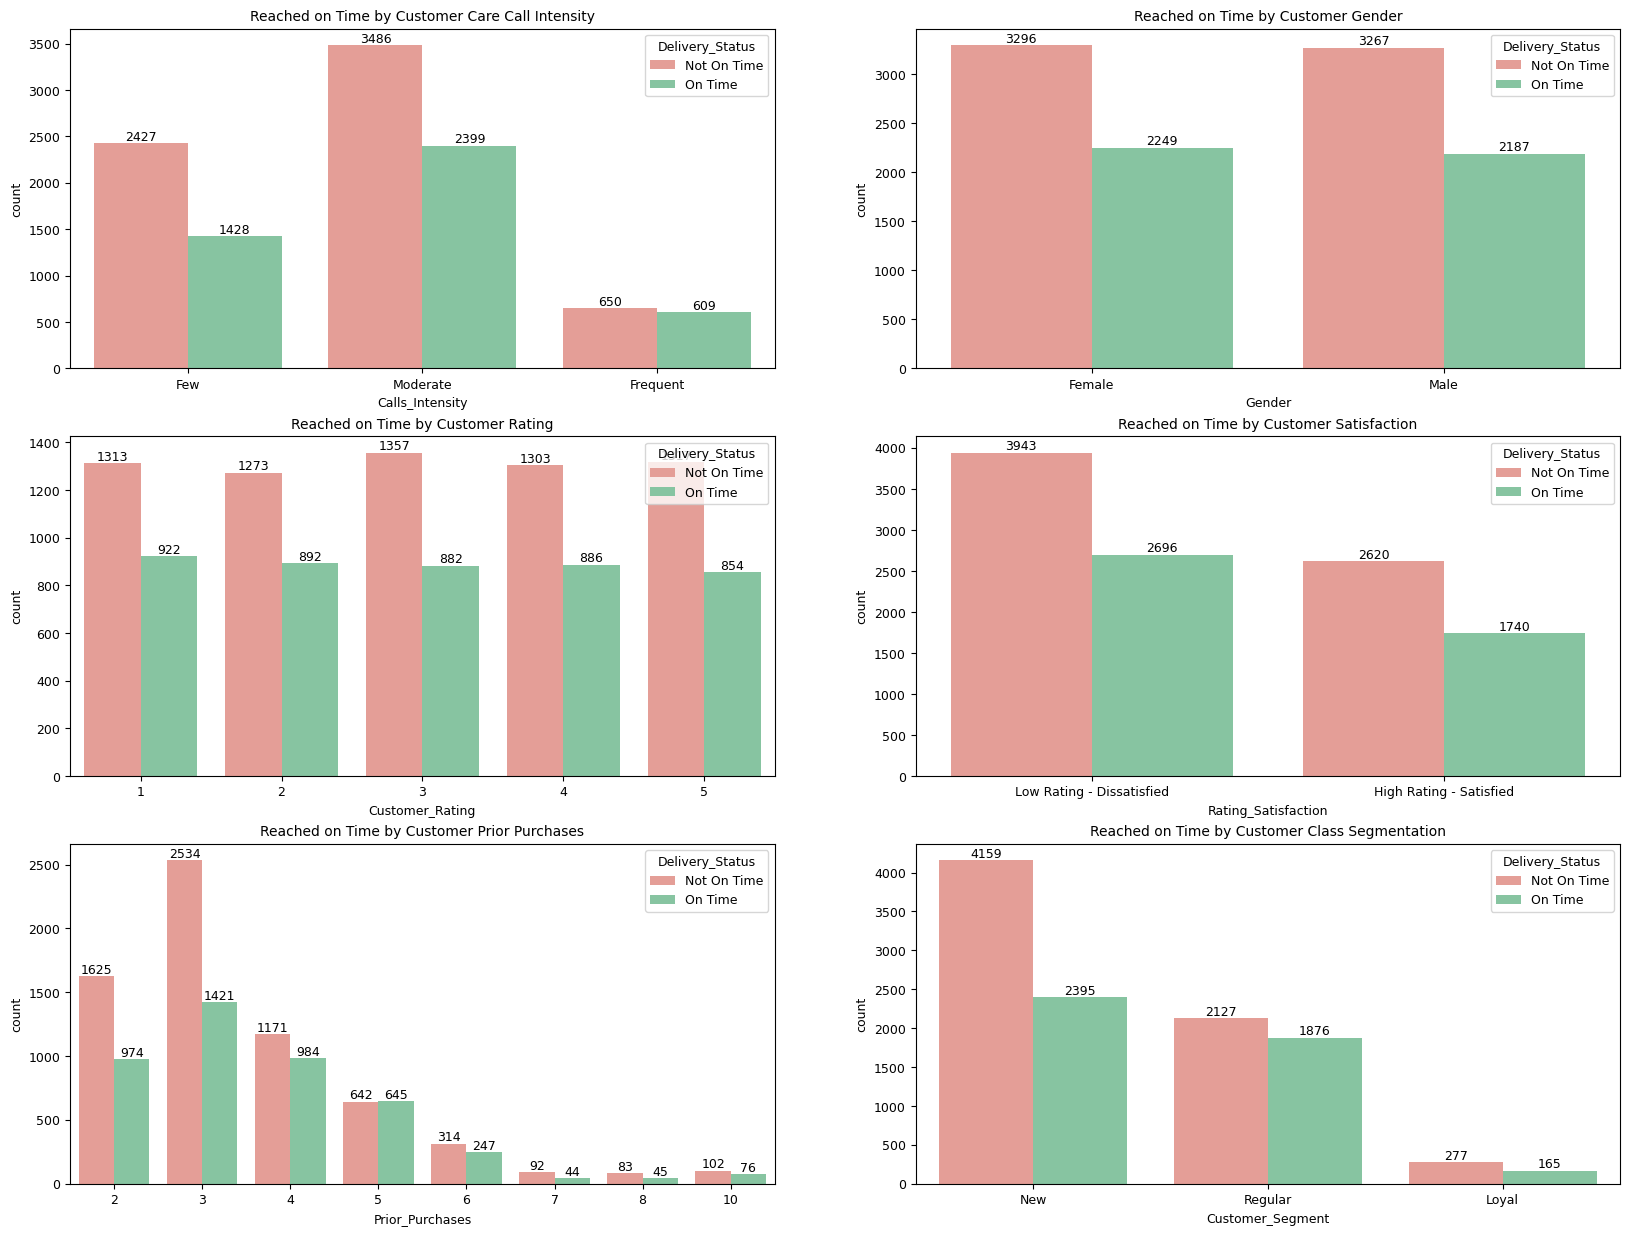

In [71]:
# create a subplot with six countplots showing delivery status 
# by customer factors (calls, gender, rating and its segment, and prior purchases and its segment)
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))

cols = ['#F1948A', '#7DCEA0']

sns.countplot(data=df, x='Calls_Intensity', hue ='Delivery_Status', palette=cols, ax=ax1, order=['Few', 'Moderate', 'Frequent'])
sns.countplot(data=df, x='Gender', hue ='Delivery_Status', palette=cols, ax=ax2, order=['Female', 'Male'])
sns.countplot(data=df, x='Customer_Rating', hue ='Delivery_Status', palette=cols, ax=ax3)
sns.countplot(data=df, x='Rating_Satisfaction', hue ='Delivery_Status', palette=cols, ax=ax4, order=['Low Rating - Dissatisfied', 'High Rating - Satisfied'])
sns.countplot(data=df, x='Prior_Purchases', hue ='Delivery_Status', palette=cols, ax=ax5)
sns.countplot(data=df, x='Customer_Segment', hue ='Delivery_Status', palette=cols, ax=ax6, order=['New', 'Regular', 'Loyal'])

ax1.set_title('Reached on Time by Customer Care Call Intensity', fontsize=10)
ax2.set_title('Reached on Time by Customer Gender', fontsize=10)
ax3.set_title('Reached on Time by Customer Rating', fontsize=10)
ax4.set_title('Reached on Time by Customer Satisfaction', fontsize=10)
ax5.set_title('Reached on Time by Customer Prior Purchases', fontsize=10)
ax6.set_title('Reached on Time by Customer Class Segmentation', fontsize=10)

for container in ax1.containers:
    ax1.bar_label(container, label_type='edge')

for container in ax2.containers:
    ax2.bar_label(container, label_type='edge')

for container in ax3.containers:
    ax3.bar_label(container, label_type='edge')

for container in ax4.containers:
    ax4.bar_label(container, label_type='edge')

for container in ax5.containers:
    ax5.bar_label(container, label_type='edge')

for container in ax6.containers:
    ax6.bar_label(container, label_type='edge')

plt.show()

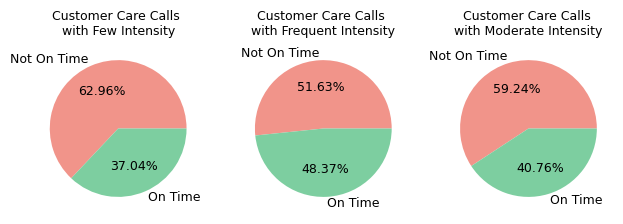

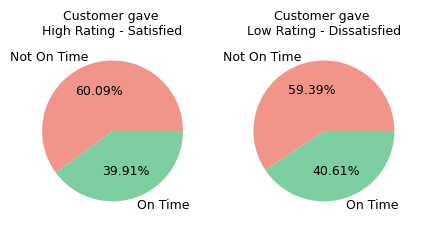

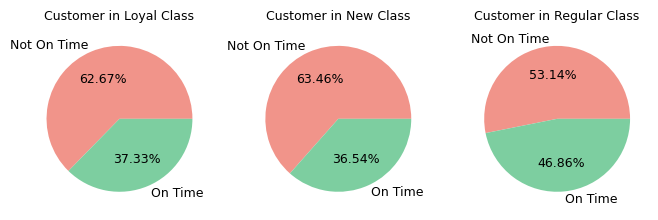

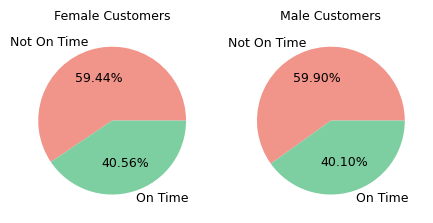

In [72]:
calls = sorted(df['Calls_Intensity'].unique())
rate = sorted(df['Rating_Satisfaction'].unique())
priorpurch = sorted(df['Customer_Segment'].unique())
gender = sorted(df['Gender'].unique())

cols = ['#F1948A', '#7DCEA0']
plt.rcParams['font.size'] = 9

# plot pie charts for delivery status by customer care calls intensity
plt.figure(figsize=(7.5, 3))
for i, calls in enumerate(calls, 1):
    subset = df[df['Calls_Intensity'] == calls]
    counts = subset['Delivery_Status'].value_counts()
    plt.subplot(1, 3, i)
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', colors=cols)
    plt.title(f'Customer Care Calls \nwith {calls} Intensity', fontsize=9)

# plot pie charts for delivery status by customer satisfaction rating
plt.figure(figsize=(5, 3))
for i, rate in enumerate(rate, 1):
    subset = df[df['Rating_Satisfaction'] == rate]
    counts = subset['Delivery_Status'].value_counts()
    plt.subplot(1, 2, i)
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', colors=cols)
    plt.title(f'Customer gave \n{rate}', fontsize=9)

# plot pie charts for delivery status by customer class segmentation
plt.figure(figsize=(8, 3))
for i, priorpurch in enumerate(priorpurch, 1):
    subset = df[df['Customer_Segment'] == priorpurch]
    counts = subset['Delivery_Status'].value_counts()
    plt.subplot(1, 3, i)
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', colors=cols)
    plt.title(f'Customer in {priorpurch} Class', fontsize=9)

# plot pie charts for delivery status by customer gender
plt.figure(figsize=(4.5, 3))
for i, gender in enumerate(gender, 1):
    subset = df[df['Gender'] == gender]
    counts = subset['Delivery_Status'].value_counts()
    plt.subplot(1, 2, i)
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', colors=cols)
    plt.title(f'{gender} Customers', fontsize=9)

plt.tight_layout()
plt.show()

**INSIGHT 6**
****
- **Delivery Status Dominance:**
  - **Not On Time deliveries still dominate** across all categories, with percentages ranging from approximately 51% to 64%. However, it's noteworthy that certain categories, such as **customers with a `Prior_Purchases` = 5**, exhibit **slightly higher on-time counts**, even though Not On Time deliveries still dominate.

- **Dominant Categories:**
  - **For Customer Care Call Intensity:** **Moderate intensity** calls have the most deliveries, with 3486 not on time (59.24%) and 2399 on time (40.76%).
  - **For Customer Satisfaction Rating:** **Low Rating - Dissatisfied** customers lead in deliveries, with 3943 not on time (59.39%) and 2696 on time (40.61%), particularly with most in `Customer_Rating` = 3.
  - **For Customer Segment:** **New customers** top the deliveries, with 4159 not on time (63.46%) and 2395 on time (36.54%), particularly with higher instances in `Prior_Purchases` = 3.
  - **For Customer Gender:** **Female customers** have the highest number of deliveries, with 3296 not on time (59.44%) and 2249 on time (40.56%).

- **Highest Not On Time Rate (Lower Performance):**
  - **For Customer Care Call Intensity:** **Few intensity** calls have the highest not on time rate of 62.96%.
  - **For Customer Satisfaction Rating:** **High Rating - Satisfied** customers exhibit the highest not on time rate of 60.09%.
  - **For Customer Segment:** **New customers** demonstrate the highest not on time rate of 63.46%.
  - **For Customer Gender:** **Male customers** display the highest not on time rate of 59.90%.

- **Highest On Time Rate (Good Performance):**
  - **For Customer Care Call Intensity:** **Frequent intensity** calls have the highest on time rate of 48.37%.
  - **For Customer Satisfaction Rating:** **Low Rating - Dissatisfied** customers showcase the highest on time rate of 40.61%.
  - **For Customer Segment:** **Regular class** customers exhibit the highest on time rate of 46.86%.
  - **For Customer Gender:** **Female customers** have the highest on time rate of 40.56%.

##### **Correlation Between Delivery Status and Other Numerical Columns**

This analysis serves to reinforce insights gained from previous comparisons based on three key factors. By examining the correlation between delivery status and other numerical columns, we aim to strengthen our understanding of the primary factors contributing to delays in delivery.

In [73]:
# calculate Spearman correlation between numerical columns and 'Delivery_Status_IsNotOnTime'
df_corr = df.corr(numeric_only=True, method='spearman')[['Delivery_Status_IsNotOnTime']].sort_values(by='Delivery_Status_IsNotOnTime')
df_corr

,Delivery_Status_IsNotOnTime
Product_Weight,-0.265958
Prior_Purchases,-0.074643
Product_Cost,-0.071850
Customer_Calls,-0.064283
Customer_Rating,0.013108
Product_Importance_Num,0.016075
Product_Discount,0.335108
Delivery_Status_IsNotOnTime,1.000000


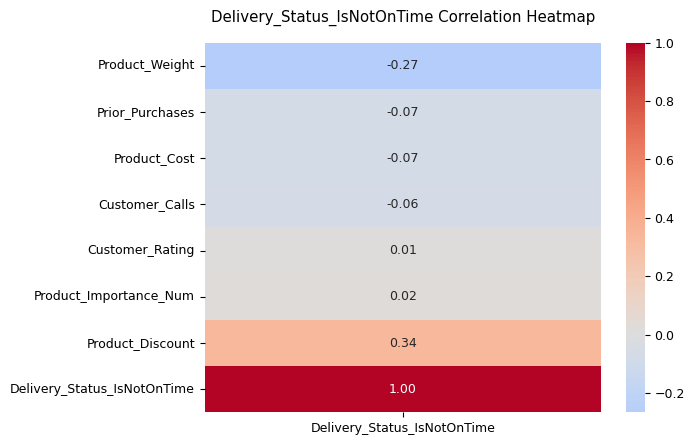

In [74]:
# plot a heatmap to visualize the correlation between 'Delivery_Status_IsNotOnTime' and other numerical columns
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Delivery_Status_IsNotOnTime Correlation Heatmap', pad=15)
plt.show()

**INSIGHT 7**
****
- **Moderate Correlations:**

    + **Product Discount Impact:**
        <br>
        There is a moderate positive correlation (0.34) between product discounts and delivery delays. This means that products with higher discounts are more likely to be delayed.
    + **Product Weight Influence:**
        <br>
        A moderate negative correlation (-0.27) exists between product weight and delivery delays. Heavier products tend to have fewer delays.

- **Weak Correlations:**

    + **Customer Prior Purchases Effect:**
        <br>
        There is a weak negative correlation (-0.07) indicating that customers with more prior purchases tend to have slightly fewer delivery delays.
    + **Product Cost Contribution:**
        <br>
        There is a weak negative correlation (-0.07) between product cost and delivery delays, suggesting that higher-cost products are slightly less likely to be delayed.
    + **Customer Calls Influence:**
        <br>
        With a weak negative correlation (-0.06), more frequent customer calls are slightly associated with fewer delivery delays.

##### **Correlation Between Product Weight Class and Product Discount Offered**

In this section, we examine the relationship between product weight and the discounts offered. By calculating the correlation between these two variables and visualizing the distribution of discounts across different weight classes with a box plot, we aim to understand why heavier products tend to have a lower likelihood of being late. Additionally, this analysis will explore why products with higher discounts are more prone to delays. This will provide insights into how weight and discount factors impact delivery timeliness and prove and/or strengthen the previous insights.

In [75]:
# calculate Spearman correlation between 'Product_Discount' and 'Product_Weight'
df_corr = df[['Product_Discount', 'Product_Weight']].corr(method='spearman')
df_corr

,Product_Discount,Product_Weight
Product_Discount,1.000000,-0.315677
Product_Weight,-0.315677,1.000000


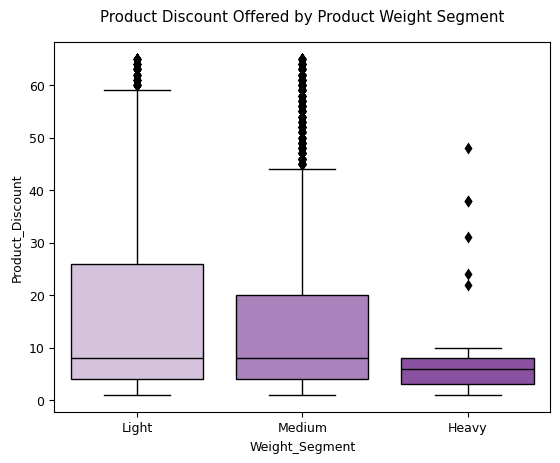

In [76]:
# plot a boxplot to visualize the distribution of product discounts offered by product weight segment
sns.boxplot(data=df, x='Weight_Segment', y='Product_Discount', palette=['#D7BDE2','#AF7AC5','#8E44AD'], hue='Weight_Segment',
            linecolor='black', flierprops=dict(marker='d', markersize=6, markeredgecolor='None', markerfacecolor='black'))
plt.title('Product Discount Offered by Product Weight Segment', pad=15)
plt.show()

**INSIGHT 8**
****
- **Correlation between Product Weight and Discount:**
    - The correlation analysis reveals a moderate negative correlation (-0.32) between product weight and the discount offered. This suggests that as the weight of the product increases, the discount offered tends to decrease, and vice versa.
- **Impact on Delivery Delays:**
    - The box plot visualization further supports the correlation, showing that lighter-weight products typically receive higher discount offers. On the other hand, heavier products tend to have lower discount rates.
    - This indicates that both product weight and the discount offered significantly influence delivery delays. Lighter products with higher discounts are more likely to experience delays, while heavier products with lower discounts have a lower probability of being late.

****
# **Conclusion**
****
1. **Delivery Status Overview:**
   - Most deliveries are late, making up about 60% of all shipments. This shows that there is a big problem with delays in delivering products.

2. **Key Factors in Shipping Delays:**
   - **Product Weight and Discount:**
      - We found two main things that affect delays: how much discount we offer on products and how heavy the products are.
      - If we offer big discounts, there is a higher chance of delays. On the other hand, heavier products are less likely to be late. Therefore,  if it is a lighter product, there is a higher chance of it being delayed.
      - Lighter products usually get bigger discounts, and they are more likely to be late. But heavier products, which usually get smaller discounts, are usually on time.

3. **Other Influencing Factors:**
   - **Warehouse Block and Shipping Mode:**
     - Many products are piling up in Warehouse Block E, and the shipment mode is heavily dominated by ship mode. This accumulation in a single warehouse block and reliance on just one shipment method may contribute to delivery delays. However, we cannot rely on this factor because there is no accurate data on how products are distributed across warehouses and shipment modes. Since the count of products in Block E is exactly twice of the other blocks, there is a possibility that one block is missing in the dataset. 
   - **Customer Calls and Prior Purchases:**
     - Some other factors like how many times a customer has bought from us before and how often customers call about their orders also matter, but they do not have a big impact on delays.
   - **Product Cost:**
     - Higher-cost products are slightly less prone to delays, but this also do not have a big impact on delays.

5. **Key Factors Assumptions:**

   - **Product Weight:** Lighter products might be more prone to getting lost, misplaced, or damaged, leading to delays. They might also be less of a priority for shipping staff compared to heavier, bulkier items that are easier to manage and track.
   - **Product Discount:** Higher discount products could be part of clearance sales or promotional offers, making them less profitable for the company. As a result, these items might not be prioritized for quick delivery. Additionally, higher discount products might be in higher demand, leading to inventory management issues and delays in shipping.

****
# **Actionable Recommendation**
****
1. **Limit Products in Light Weight Segment:** To increase on-time delivery rates, consider limiting the number of products in the light weight segment (products below 1839.5 grams). By focusing on heavier products, which have shown to be less likely to experience delays, the company can improve overall delivery performance.

2. **Adjust Discount Strategies:** Offer lower discounts on products to potentially reduce delays in delivery. Lower discounts not only correlate with better on-time delivery rates but also contribute to cost savings for the company. By optimizing discount strategies, the company can maintain profitability while improving delivery performance.

3. **Distribute Products Across Warehouses:** Instead of concentrating products in a single warehouse block, distribute them evenly across multiple blocks. This helps reduce crowdedness and blockages in the shipping process, leading to smoother operations and potentially faster deliveries.

4. **Diversify Shipment Modes:** Explore diversifying shipment modes beyond just relying on one dominant mode, such as the ship mode. By incorporating alternative modes like flights or road transport, the company can introduce flexibility and efficiency into the shipping process, reducing overall delivery times.

5. **Monitor Customer Calls:** Although customer calls show a weak correlation with delivery delays, it is still essential to monitor customer inquiries and feedback regarding shipment statuses. Addressing customer concerns promptly can help improve satisfaction and mitigate potential delays.